# Loading of trARPES data as collected using the Phoibos detector at FHI Berlin.
## Analysis of CrSBr by Lawson Lloyd. 2024. #2

First, the SpecsScan class is imported which has the scan loader as its class method.

In [1]:
from specsscan import SpecsScan
from pathlib import Path
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.colors as col
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive
import csv
import os
import dill

Here, a SpecsScan class instance is created as per the configuration provided in [config.yaml](../tests/data/config.yaml). The user may set the entries in config.yaml file, for example, the data path and conversion parameters as per the requirements before creating this instance

### The path may changed to point to the scan folder of the data of interest (for example, on a server drive)

In [2]:
#sps = SpecsScan(config="../tests/data/config.yaml")
sps = SpecsScan(config="new_config.yaml")
#path = "../tests/data/" # Path to the test data set

INFO - Configuration loaded from: [/mnt/pcshare/users/Lawson/2024 Specsscan Notebooks: CrSBr/new_config.yaml]
INFO - System config loaded from: [/mnt/pcshare/specsscan/config_v1.yaml]
INFO - Default config loaded from: [/home/metis/sed/venv/lib/python3.12/site-packages/specsscan/config/default.yaml]
INFO - Default config loaded from: [/home/metis/sed/venv/lib/python3.12/site-packages/specsanalyzer/config/default.yaml]


The load_scan method loads the scan as an xarray along with the metadata needed for nexus conversion. The progress bars can be activated by changing the config parameter, enable_nested_progress_bar, to true in config.yaml 

# Load in Your Data for Analysis

### Multiple datasets can be loaded simultaneously, with the scan number in the filename.

In [7]:
fns = np.array([ 9170, 9219, 9217, 9218, 9216, 9220, 9228]) #scans

fns = [9411, 9410, 9408, 9409, 9400, 9370, 9367]
fns = [9219, 9217, 9218, 9216, 9220, 9228] #scans
fns = [9137, 9517, 9140, 9056, 8893]
fns = [9525, 9526]
fns = [9070, 9071, 9056, 9055, 9049,9103]
fns = [9545, 9539, 9538, 9537, 9533, 9431, 9517, 9510, 9499, 9446, 9412, 9411, 9410, 9409, 9408, 9399, 9400, 9385, 9378, 9373, 9370, 9369, 9368, 9367, 9349, 9348, 9335, 9330, 9329, 9327]
fns = [9227]

fns = [9227, 9219, 9217, 9218, 9216, 9220, 9228, 9231, 9525, 9517, 9526] # Scans to analyze and fit below: 910 nm + 400 nm
fns = [9085, 9137, 9056, 9417]

### ELOG #4
fns = [9539, 9538, 9537, 9533, 9532, 9531] #>900 nm exc
fns = [9499, 9510, 9517, 9523, 9525, 9526] #400 nm exc
fns = [9408, 9409, 9410, 9411, 9412, 9413] # 640 nm
fns = [9400, 9399, 9398, 9385] #680 nm
fns = [9378, 9376, 9373, 9370, 9369, 9368, 9367, 9358] #700
fns = [9327, 9328, 9329, 9330, 9335, 9348, 9349] #700

### ELOG #3
#910nm
fns = [9241, 9240, 9239, 9238, 9237, 9231, 9230, 9229, 9228, 9227, 9221, 9220, 9219, 9218, 9217, 9216, 9208, 9207, 9185, \
       9184, 9183, 9181, 9180, 9177, 9176, 9173, 9172, 9171, 9170, 9164]

### ELOG #2
fns = [9056, 9137, 9140] #long delays, 910 then 400nm

### ELOG #1
fns = [8993, 8955]

save_data = False

fns = [9219, 9217, 9218, 9216, 9220, 9228]


In [12]:
#Load in your scan files...

for i in range(0,len(fns)):
    #vars()[str('res_'+str(fns[i]))]  = sps.load_scan(
        #scan = int(fns[i]), # Scan number
        #iterations = 0
    vars()[str('res_'+str(fns[i]))] = sps.load_scan(
        
    apply_fft_filter=True, 
    scan = fns[i]
    
    ).rename({'angular0': 'Angle', 'energy': 'Ekin'})
    
    res_loaded = vars()[str('res_'+str(fns[i]))]
    
    if save_data is True:
        sps.save(f"Scan{str(fns[i])}.h5")
    
print('You have loaded '+str(len(fns))+' files!')


INFO - Scan path not provided, searching directories...
INFO - Scan found at path: /mnt/topfloor/trARPES/PESData/2024/2024_04/2024_04_17/Raw Data/9219


  0%|          | 0/76 [00:00<?, ?it/s]

INFO - Cropping parameters not found, using cropping ranges from config...
INFO - Gathering metadata from different locations
INFO - Collecting time stamps...
INFO - Scan path not provided, searching directories...
INFO - Scan found at path: /mnt/topfloor/trARPES/PESData/2024/2024_04/2024_04_17/Raw Data/9217


  0%|          | 0/76 [00:00<?, ?it/s]

INFO - Cropping parameters not found, using cropping ranges from config...
INFO - Gathering metadata from different locations
INFO - Collecting time stamps...
INFO - Scan path not provided, searching directories...
INFO - Scan found at path: /mnt/topfloor/trARPES/PESData/2024/2024_04/2024_04_17/Raw Data/9218


  0%|          | 0/76 [00:00<?, ?it/s]

INFO - Cropping parameters not found, using cropping ranges from config...
INFO - Gathering metadata from different locations
INFO - Collecting time stamps...
INFO - Scan path not provided, searching directories...
INFO - Scan found at path: /mnt/topfloor/trARPES/PESData/2024/2024_04/2024_04_17/Raw Data/9216


  0%|          | 0/76 [00:00<?, ?it/s]

INFO - Cropping parameters not found, using cropping ranges from config...
INFO - Gathering metadata from different locations
INFO - Collecting time stamps...
INFO - Scan path not provided, searching directories...
INFO - Scan found at path: /mnt/topfloor/trARPES/PESData/2024/2024_04/2024_04_17/Raw Data/9220


  0%|          | 0/78 [00:00<?, ?it/s]

INFO - Cropping parameters not found, using cropping ranges from config...
INFO - Gathering metadata from different locations
INFO - Collecting time stamps...
INFO - Scan path not provided, searching directories...
INFO - Scan found at path: /mnt/topfloor/trARPES/PESData/2024/2024_04/2024_04_18/Raw Data/9228


  0%|          | 0/77 [00:00<?, ?it/s]

INFO - Cropping parameters not found, using cropping ranges from config...
INFO - Gathering metadata from different locations
INFO - Collecting time stamps...
You have loaded 6 files!


In [189]:
res_9219

<xarray.DataArray (Angle: 175, Ekin: 287, delay: 76)> Size: 15MB
array([[[1.4866566e+06, 1.5192044e+06, 1.5084441e+06, ...,
         1.5434370e+06, 1.5124726e+06, 1.5686630e+06],
        [1.5429484e+06, 1.5680625e+06, 1.5528569e+06, ...,
         1.5500839e+06, 1.5606906e+06, 1.5952866e+06],
        [1.5315382e+06, 1.5744982e+06, 1.5523815e+06, ...,
         1.5381684e+06, 1.5748782e+06, 1.5809138e+06],
        ...,
        [5.3134241e+02, 4.9838422e+02, 5.0884546e+02, ...,
         4.9535492e+02, 5.5047559e+02, 5.0740585e+02],
        [5.5241052e+02, 5.1393732e+02, 5.2731647e+02, ...,
         5.1321289e+02, 6.2185779e+02, 5.3440369e+02],
        [5.9810217e+02, 5.6318427e+02, 5.7251227e+02, ...,
         5.5872595e+02, 6.2323303e+02, 5.7489526e+02]],

       [[1.5386125e+06, 1.5773761e+06, 1.5572564e+06, ...,
         1.5927766e+06, 1.5669202e+06, 1.6069688e+06],
        [1.5817619e+06, 1.6222308e+06, 1.5983969e+06, ...,
         1.5961224e+06, 1.6076845e+06, 1.6241731e+06],
        [1.5641320e+06, 1.6303284e+06, 1.5869180e+06, ...,
         1.5896899e+06, 1.6230339e+06, 1.6191112e+06],
...
        [4.8004055e+01, 1.4476813e+03, 5.4562019e+01, ...,
         7.9326270e+02, 6.0579517e+01, 3.8449108e+01],
        [4.9331081e+01, 3.2911194e+02, 6.0467285e+01, ...,
         1.7607639e+02, 6.0703823e+01, 4.8705223e+01],
        [5.2608742e+01, 5.0893566e+01, 6.0931072e+01, ...,
         4.6828362e+01, 4.8287014e+01, 4.3271626e+01]],

       [[2.2924555e+06, 2.3147468e+06, 2.3238748e+06, ...,
         2.4176382e+06, 2.3462260e+06, 2.3955300e+06],
        [2.2645692e+06, 2.2104440e+06, 2.2462980e+06, ...,
         2.3244975e+06, 2.2908465e+06, 2.3185082e+06],
        [2.1953328e+06, 2.1088668e+06, 2.1701775e+06, ...,
         2.2643532e+06, 2.1926780e+06, 2.2124325e+06],
        ...,
        [2.5943396e+01, 7.5777814e+02, 2.9487595e+01, ...,
         1.1576190e+03, 3.2189857e+01, 2.0779503e+01],
        [2.3735661e+01, 1.2539592e+02, 2.9093847e+01, ...,
         2.9935596e+02, 2.9194838e+01, 2.3434528e+01],
        [2.1609245e+01, 2.0630396e+01, 2.5028248e+01, ...,
         2.4146645e+01, 1.9837978e+01, 1.7775383e+01]]], dtype=float32)
Coordinates:
  * Angle    (Angle) float64 1kB -12.23 -12.09 -11.95 ... 11.95 12.09 12.23
  * Ekin     (Ekin) float64 2kB 18.53 18.54 18.55 18.57 ... 22.34 22.35 22.37
  * delay    (delay) float64 608B -750.0 -700.0 -650.0 ... 2.95e+03 3e+03
Attributes:
    metadata:  {'scan_info': {'ScanType': 'delay', 'Averages': 100.0, 'Repeti...

### Reference Scan Parameters (Wavelength, fluence...)

In [14]:
filename = '2024 Bulk CrSBr Phoibos.csv'

scan_info = {}

reader = csv.DictReader(open(filename))

for row in reader:
    key = row.pop('Scan')
    if key in scan_info:
        # implement your duplicate row handling here
        pass
    scan_info[key] = row
    
#print(scan_info)

In [15]:
scans = [9219, 9217, 9218, 9216, 9220, 9228] # Scans to analyze and fit below.
max_power = 500 # Max power, used to calculate power from percentage

scan_info_loaded = [scan_info[str(s)] for s in scans]

In [16]:
trans_percent = [float(scan_info[str(s)].get("Percent")) for s in scans] # Retrieve the percentage
power = [0.01*t*max_power*1.05 for t in trans_percent] 

In [17]:
power

[8.295, 20.895000000000003, 41.685, 65.625, 83.2125, 104.73750000000001]

In [18]:
scans_delay_shift = [9170, 9176, 9180, 9183, 9184]
scans_lowT = [9237, 9240, 9241]

In [19]:
(scan_info['9499'])

{'Wavelength': '400',
 'Percent': '20.00',
 'Power': '',
 'Temperature': '300',
 '': 'Delay Scan'}

In [20]:
import matplotlib as mpl

def custom_colormap(CMAP, lower_portion_percentage):
    # create a colormap that consists of
    # - 1/5 : custom colormap, ranging from white to the first color of the colormap
    # - 4/5 : existing colormap

    # set upper part: 4 * 256/4 entries

    upper =  CMAP(np.arange(256))
    upper = upper[56:,:]

    # - initialize all entries to 1 to make sure that the alpha channel (4th column) is 1
    lower_portion = int(1/lower_portion_percentage) - 1

    lower = np.ones((int(200/lower_portion),4))
    # - modify the first three columns (RGB):
    #   range linearly between white (1,1,1) and the first color of the upper colormap
    for i in range(3):
      lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])

    # combine parts of colormap
    cmap = np.vstack(( lower, upper ))

    # convert to matplotlib colormap
    custom_cmap = mpl.colors.ListedColormap(cmap, name='custom', N=cmap.shape[0])

    return custom_cmap

cmap_LTL = custom_colormap(mpl.cm.viridis, 0.25)

# trARPES Plots of Scans of Interest: First Look
## Plot Panels to Explore the Data

In [21]:
scan_to_plot, energy_offset = [9327, 9329, 9330, 9335, 9348, 9349], 19.8
scan_to_plot, energy_offset = [9227], 19.7
scan_to_plot, energy_offset = [9216], 19.7
#scan_to_plot, energy_offset = [9370], 19.7

#scan_to_plot, energy_offset = [9227, 9219, 9217, 9218, 9216, 9220, 9228, 9231], 19.75

custom_Power = 0
custom_delay_limit = 0

######

colormap = 'magma_r'
colormap = cmap_LTL

cmap_max = 1
edc_sat = 0.015

E, Eint = [2.05, 1.35], 0.1 # center energies, Total width of Energy integration range
a, aint, a_full = [0, 0], 20, [-12, 12]

######
######
    
res_to_plot = vars()[str('res_'+str(scan_to_plot[s]))]
res_to_plot = res_to_plot.assign_coords(Ekin=(res_to_plot.Ekin-energy_offset))
WL = scan_info[str(scan_to_plot[s])].get("Wavelength")
if (scan_to_plot[s]) < 9160:
    Per = float(scan_info[str(scan_to_plot[s])].get("Power"))
    #Per = float(scan_info[str(scan_to_plot[s])].get("Power"))*1*1.0*1
else:
    Per = float(scan_info[str(scan_to_plot[s])].get("Percent"))*0.01*1.05*max_power
if custom_Power == 1:
    Per = 0
#Per = ? 
Temp = scan_info[str(scan_to_plot[s])].get("Temperature")
if custom_delay_limit > 0:
    delay_limit = custom_delay_limit
else:
    delay_limit = res_to_plot.delay.max()

#delay_limit = 3000

neg_map = res_to_plot.sel(delay = slice(-1000,-200)).sum(axis=2)
neg_map = neg_map/np.max(neg_map)
pos_map = res_to_plot.sel(delay = slice(0,3000)).sum(axis=2)
pos_map = pos_map/np.max(pos_map)
diff_map = pos_map - neg_map
diff_map = diff_map/np.max(np.abs(diff_map))

i_1 = 0.8
i_2 = 3
logic_mask = np.ones(diff_map.shape)
masked_max = np.max(diff_map.sel(Ekin = slice(i_1,i_2))).values

i1 = np.abs(diff_map.Ekin.values - i_1).argmin()
i2 = np.abs(diff_map.Ekin.values - i_2).argmin()
logic_mask[:, i1:i2] *= 1/masked_max #unmasked_max/masked_max

diff_map_mask = diff_map*logic_mask

###
res_to_plot_EDCs = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
res_to_plot_EDCs_neg = res_to_plot_EDCs.sel(delay = slice(-600,-200)).sum(axis=1)
res_to_plot_EDCs_pos = res_to_plot_EDCs.sel(delay = slice(0, delay_limit)).sum(axis=1)
res_to_plot_EDCs_neg = res_to_plot_EDCs_neg/np.max(res_to_plot_EDCs_neg)
res_to_plot_EDCs_pos = res_to_plot_EDCs_pos/np.max(res_to_plot_EDCs_pos)

EDC_diff = res_to_plot_EDCs_pos - res_to_plot_EDCs_neg
EDC_diff = 0.01*EDC_diff/np.max(EDC_diff.sel(Ekin=slice(i_1,i_2)))

res_to_plot_delay = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
res_to_plot_delay = res_to_plot_delay/np.max(res_to_plot_delay)
res_to_plot_delay_neg = res_to_plot_delay.sel(delay = slice(-1000,-100)).sum(axis=1)
res_to_plot_delay_neg = res_to_plot_delay_neg/np.max(res_to_plot_delay_neg)

res_to_plot_delay_diff = res_to_plot_delay - res_to_plot_delay_neg
res_to_plot_delay_diff = res_to_plot_delay_diff/np.max(np.abs(res_to_plot_delay_diff))

logic_mask_2 = np.ones(res_to_plot_delay_diff.shape)
masked_max_2 = np.max(res_to_plot_delay.sel(Ekin = slice(i_1,i_2))).values

i11 = np.abs(res_to_plot_delay_diff.Ekin.values - i_1).argmin()
i22 = np.abs(res_to_plot_delay_diff.Ekin.values - i_2+0.2).argmin()
logic_mask_2[i11:i22,:] *= 1/masked_max_2 #unmasked_max/masked_max

res_to_plot_delay_diff_mask = res_to_plot_delay_diff*logic_mask_2

E_1, E_2 = .8, 3
mask = np.ones(res_to_plot_delay.shape)
i11 = np.abs(res_to_plot_delay.Ekin.values - E_1).argmin()
i22 = np.abs(res_to_plot_delay.Ekin.values - E_2+0.2).argmin()
mask[20:i22,:] *= 1/np.max(res_to_plot_delay.sel(Ekin = slice(E_1,E_2)).values)
res_to_plot_delay *= mask

###
trace_1 = res_to_plot.sel(Angle = slice(a[0]-aint,a[0]+aint), Ekin = slice(E[0]-Eint/2, E[0]+Eint/2)).sum(axis=(0,1))
trace_2 = res_to_plot.sel(Angle = slice(a[1]-aint,a[1]+aint), Ekin = slice(E[1]-Eint/2, E[1]+Eint/2)).sum(axis=(0,1))

trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-700,-200)))
trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-700,-200)))
trace_1 = trace_1/np.max(trace_2)
trace_2 = trace_2/np.max(trace_2)

m1 = np.max(trace_1)
m2 = np.max(trace_2)
m12 = np.max([m1, m2])

trace_1 = trace_1/m12
trace_2 = trace_2/m12

################
### PLOTTING ###
################
fig, axx = plt.subplots(2, 2, height_ratios = [1,1], width_ratios = [1,2])
fig.set_size_inches(8, 8, forward=False)
plt.gcf().set_dpi(200)
axx = axx.flatten()

### Plot k-E ARPES Image
#(diff_map_mask).plot(ax = axx[0], add_colorbar=False, x='Angle', y='Ekin', cmap='RdBu_r', vmax = None)
#diff_map.plot(ax = axx[4*s+1], add_colorbar=False, x='Angle', y='Ekin', cmap='coolwarm', vmax = None , ylim=[18.25,22.5], xlim=[-13,16])
axx[0].axhline(20.5, linestyle = 'solid', color = 'black', linewidth = 0.5)

axx[0].set_ylim([0,2.5])

axx[0].set_xlim([-13,13])
if aint < 10:
    axx[0].axvline(a[0], linestyle = 'dashed', color = 'black')
    axx[0].axvline(a[1], linestyle = 'dashed', color = 'black')
axx[0].axhline(E[0], linestyle = 'dashed', color = 'red')
axx[0].axhline(E[1], linestyle = 'dashed', color = 'black')
axx[0].set_title('Delay Integrated')

### Plot Waterfall Dynamics Plot
(res_to_plot_delay/np.max(res_to_plot_delay)).plot(ax=axx[1],add_colorbar=False,x='delay',y='Ekin',cmap=colormap,vmin = 0, vmax = 1)
axx[1].axhline(E[0], linestyle = 'dashed', color = 'red')
axx[1].axhline(E[1], linestyle = 'dashed', color = 'black')
axx[1].set_title('Angle Integrated')
axx[1].set_xlim(-700, delay_limit)
axx[1].set_ylim(.5, 2.5)

### Plot EDCs Excited States
res_to_plot_EDCs_neg.plot(ax=axx[2], color = 'grey', label = 'Negative delay')
res_to_plot_EDCs_pos.plot(ax=axx[2], color = 'red', label = 'Positive delay')
EDC_diff.plot(ax=axx[2], color = 'green', label = 'Difference', linestyle = 'dashed')
axx[2].set_xlim(.5, 2.7)
axx[2].set_ylim(0, edc_sat)
axx[2].set_title('Scan ' + str(scan_to_plot[s]))
axx[2].set_ylabel('Norm. Int.')

### Plot Time Traces
#trace_1.plot(ax = axx[3], color = 'maroon', label = 'E = ' + str(E[0]) + ' eV')
#trace_2.plot(ax = axx[3], color = 'black', label = 'E = ' + str(E[1]) + ' eV')    
axx[3].set_xlim(-500, 3000)
axx[3].set_ylim(-0.1, 1.1)
axx[3].set_title('Scan ' + str(scan_to_plot[s]) + '. ' + str(WL) + ' nm, ' + str(round(Per)) + ' mW. T = ' + str(Temp) + ' K')
axx[3].set_ylabel('Int., a.u.')
axx[3].set_xlabel('Delay, fs')    
axx[3].set_xticks(np.arange(-1000,3200,500))
for label in axx[3].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
axx[3].set_yticks(np.arange(0,1.5,0.25))
for label in axx[3].yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
axx[3].set_xlim([-700,3000])
axx[3].set_ylim([-0.1,1.05])

params = {'lines.linewidth' : 2, 'axes.linewidth' : 1.5, 'axes.labelsize' : 16, 
          'xtick.labelsize' : 14, 'ytick.labelsize' : 14, 'axes.titlesize' : 16, 'legend.fontsize' : 12}
plt.rcParams.update(params)
fig.tight_layout()
    
fig.savefig('Scan' + str(scan_to_plot) + '.svg')

NameError: name 's' is not defined

KeyError: 'res_9370'

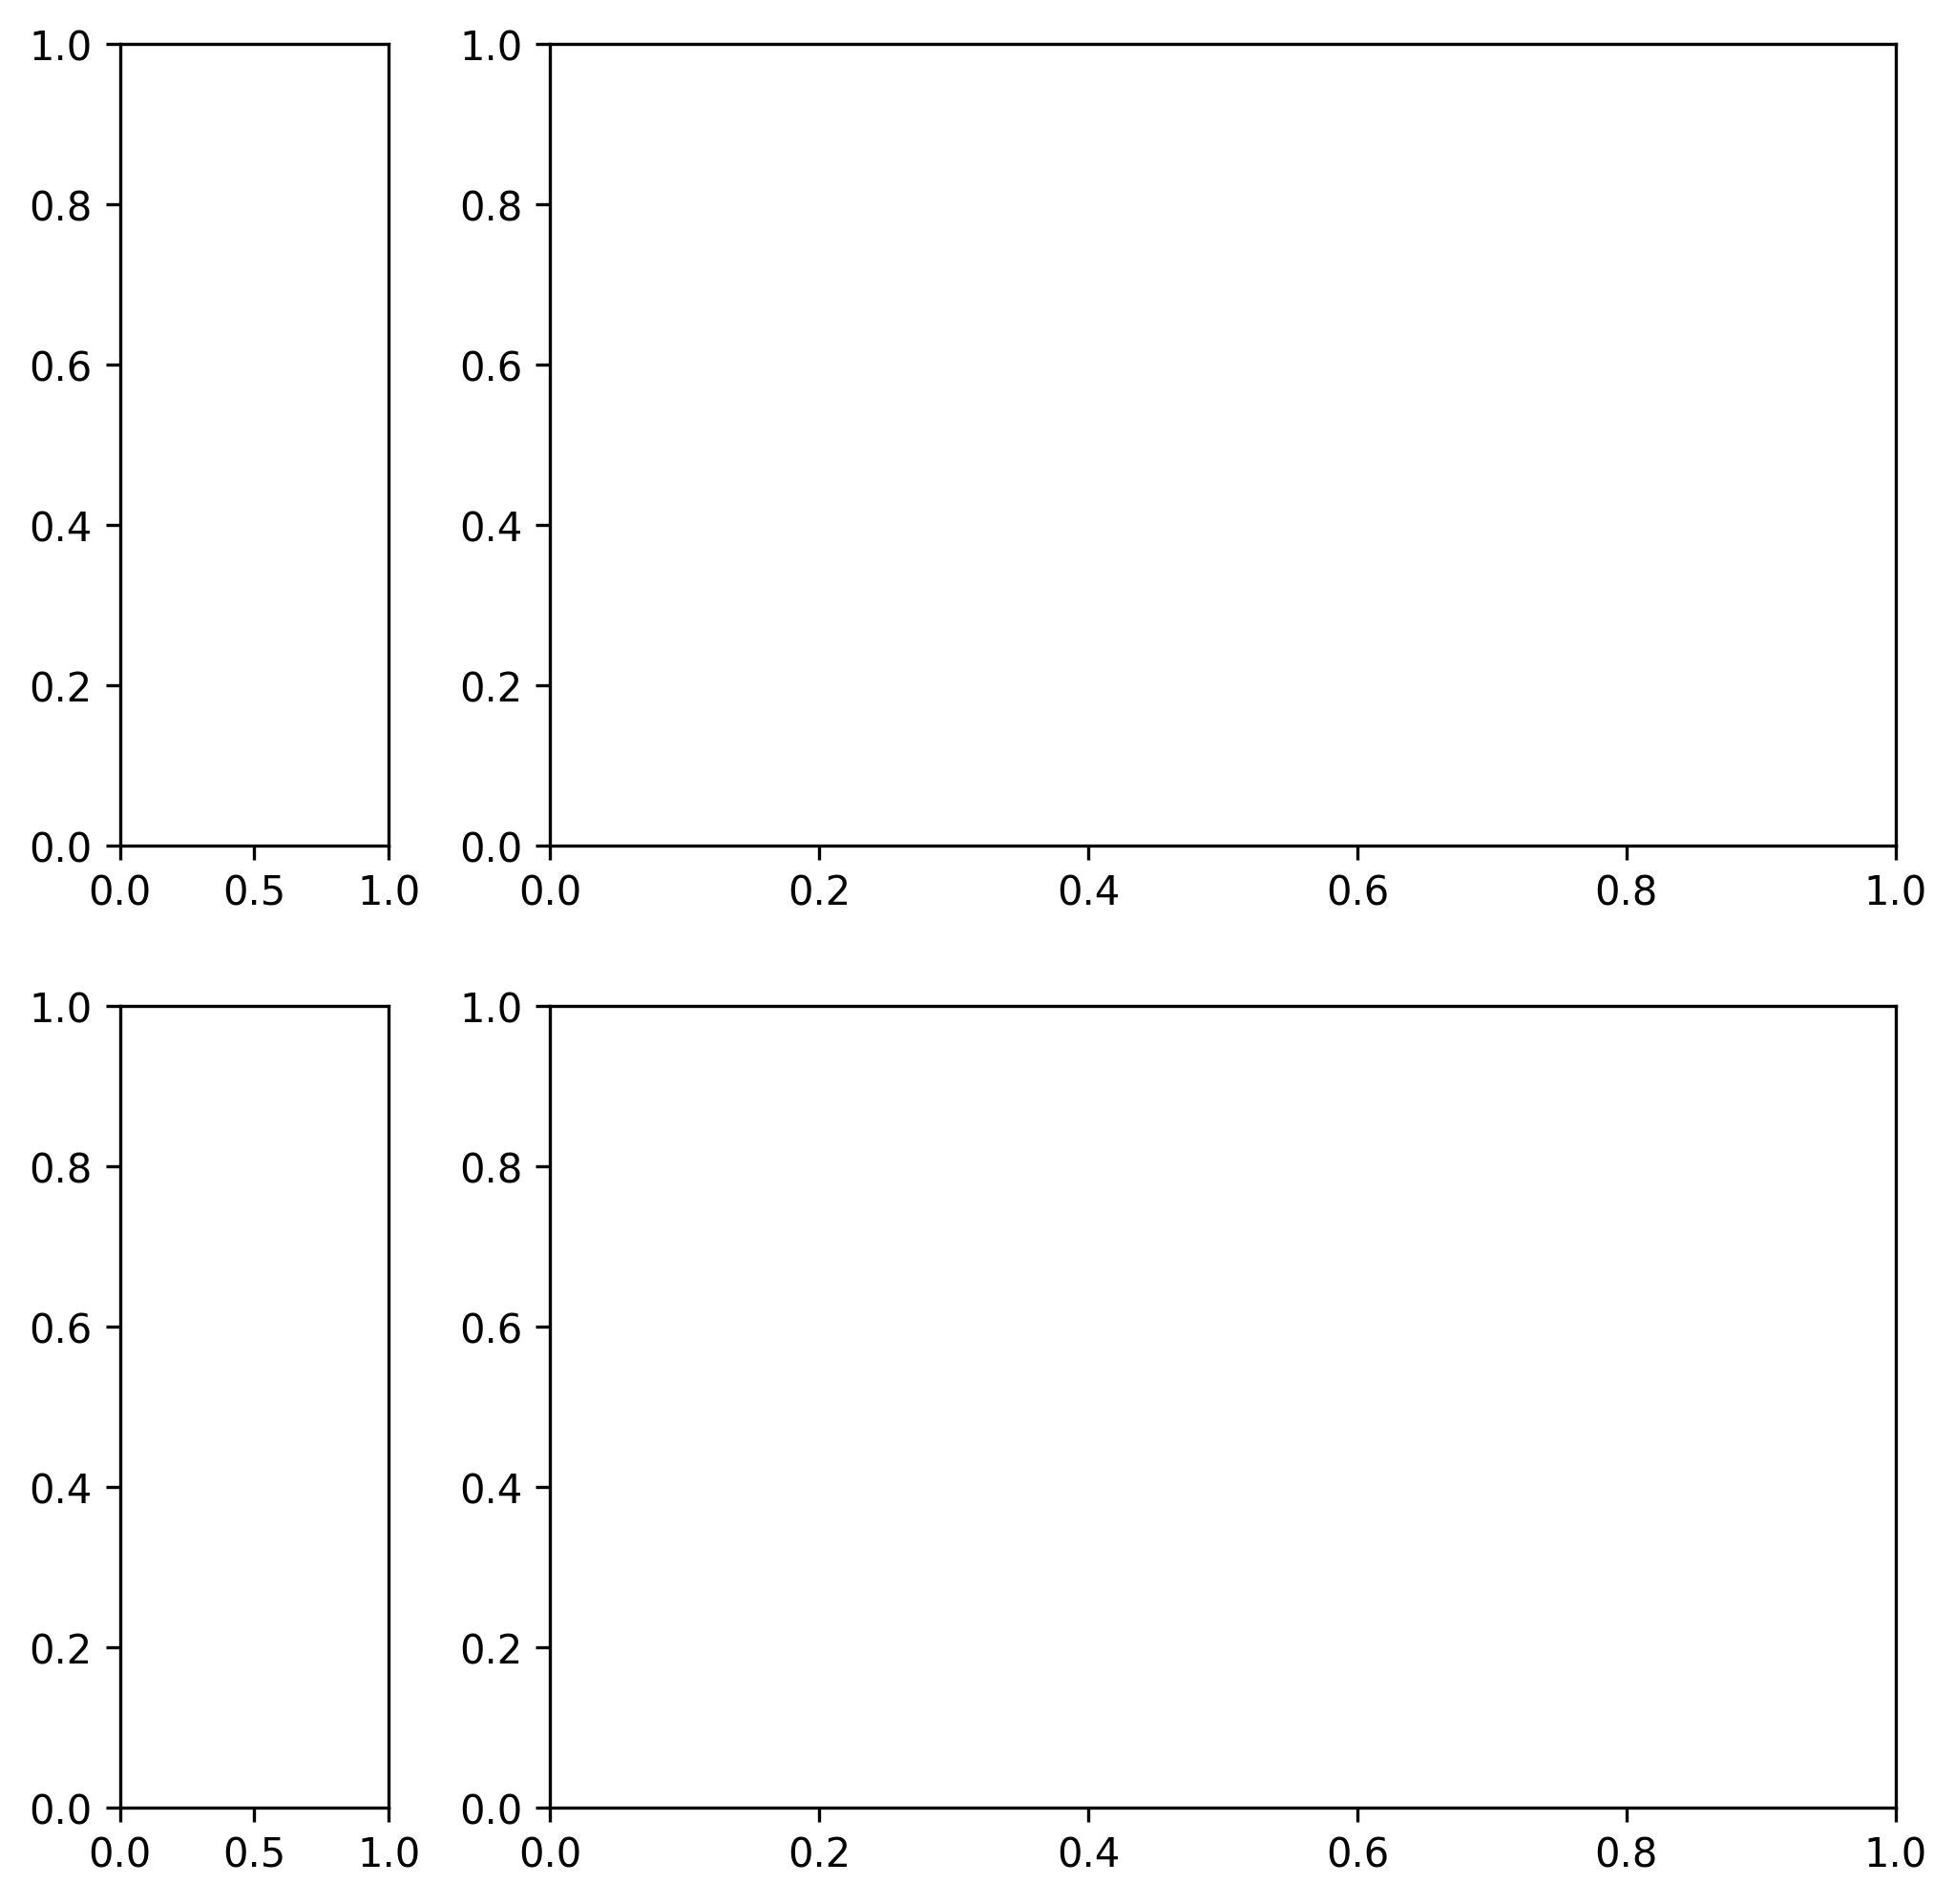

In [22]:
# Plot Difference Maps etc Comparisons....

scan_to_plot, energy_offset = [9327, 9329, 9330, 9335, 9348, 9349], 19.8
scan_to_plot, energy_offset = [9227], 19.7
scan_to_plot, energy_offset = [9517], 19.7
scan_to_plot, energy_offset = [9370], 19.7

#scan_to_plot, energy_offset = [9227, 9219, 9217, 9218, 9216, 9220, 9228, 9231], 19.75

custom_Power = 0
custom_delay_limit = 0
######

cmap_max = 1
edc_sat = 0.015

E, Eint = [2.05, 1.35], 0.1 # center energies, Total width of Energy integration range
a, aint, a_full = [0, 0], 20, [-12, 12]

######
######

fig, axx = plt.subplots(2, 2, height_ratios = [1,1], width_ratios = [1,5])
fig.set_size_inches(8, 8, forward=False)
plt.gcf().set_dpi(300)
axx = axx.flatten()

for s in range(0,len(scan_to_plot)):
    
    res_to_plot = vars()[str('res_'+str(scan_to_plot[s]))]
    res_to_plot = res_to_plot.assign_coords(Ekin=(res_to_plot.Ekin-energy_offset))
    WL = scan_info[str(scan_to_plot[s])].get("Wavelength")
    if (scan_to_plot[s]) < 9160:
        Per = float(scan_info[str(scan_to_plot[s])].get("Power"))
        #Per = float(scan_info[str(scan_to_plot[s])].get("Power"))*1*1.0*1
    else:
        Per = float(scan_info[str(scan_to_plot[s])].get("Percent"))*0.01*1.05*max_power
    if custom_Power == 1:
        Per = 0
    #Per = ? 
    Temp = scan_info[str(scan_to_plot[s])].get("Temperature")
    if custom_delay_limit > 0:
        delay_limit = custom_delay_limit
    else:
        delay_limit = res_to_plot.delay.max()
    
    #delay_limit = 3000

    neg_map = res_to_plot.sel(delay = slice(-1000,-200)).sum(axis=2)
    neg_map = neg_map/np.max(neg_map)
    pos_map = res_to_plot.sel(delay = slice(0,3000)).sum(axis=2)
    pos_map = pos_map/np.max(pos_map)
    diff_map = pos_map - neg_map
    diff_map = diff_map/np.max(np.abs(diff_map))
    
    i_1 = 1
    i_2 = 3
    i_1 = 0.95
    i_2 = 3
    logic_mask = np.ones(diff_map.shape)
    masked_max = np.max(diff_map.sel(Ekin = slice(i_1,i_2))).values

    i1 = np.abs(diff_map.Ekin.values - i_1).argmin()
    i2 = np.abs(diff_map.Ekin.values - i_2).argmin()
    logic_mask[:, i1:i2] *= 1/masked_max #unmasked_max/masked_max
    
    diff_map_mask = diff_map*logic_mask
    
    ###
    res_to_plot_EDCs = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
    res_to_plot_EDCs_neg = res_to_plot_EDCs.sel(delay = slice(-600,-200)).sum(axis=1)
    res_to_plot_EDCs_pos = res_to_plot_EDCs.sel(delay = slice(0, delay_limit)).sum(axis=1)
    res_to_plot_EDCs_neg = res_to_plot_EDCs_neg/np.max(res_to_plot_EDCs_neg)
    res_to_plot_EDCs_pos = res_to_plot_EDCs_pos/np.max(res_to_plot_EDCs_pos)

    EDC_diff = res_to_plot_EDCs_pos - res_to_plot_EDCs_neg
    EDC_diff = 0.01*EDC_diff/np.max(EDC_diff.sel(Ekin=slice(i_1,i_2)))
    
    res_to_plot_delay = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
    res_to_plot_delay = res_to_plot_delay/np.max(res_to_plot_delay)
    res_to_plot_delay_neg = res_to_plot_delay.sel(delay = slice(-1000,-100)).sum(axis=1)
    res_to_plot_delay_neg = res_to_plot_delay_neg/np.max(res_to_plot_delay_neg)
        
    res_to_plot_delay_diff = res_to_plot_delay - res_to_plot_delay_neg
    res_to_plot_delay_diff = res_to_plot_delay_diff/np.max(np.abs(res_to_plot_delay_diff))
    
    logic_mask_2 = np.ones(res_to_plot_delay_diff.shape)
    masked_max_2 = np.max(res_to_plot_delay_diff.sel(Ekin = slice(i_1,i_2))).values

    i11 = np.abs(res_to_plot_delay_diff.Ekin.values - i_1).argmin()
    i22 = np.abs(res_to_plot_delay_diff.Ekin.values - i_2+0.2).argmin()
    logic_mask_2[i11:i22,:] *= 1/masked_max_2 #unmasked_max/masked_max
    
    res_to_plot_delay_diff_mask = res_to_plot_delay_diff*logic_mask_2

    ###
    trace_1 = res_to_plot.sel(Angle = slice(a[0]-aint,a[0]+aint), Ekin = slice(E[0]-Eint/2, E[0]+Eint/2)).sum(axis=(0,1))
    trace_2 = res_to_plot.sel(Angle = slice(a[1]-aint,a[1]+aint), Ekin = slice(E[1]-Eint/2, E[1]+Eint/2)).sum(axis=(0,1))

    trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-700,-200)))
    trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-700,-200)))
    trace_1 = trace_1/np.max(trace_2)
    trace_2 = trace_2/np.max(trace_2)
    
    m1 = np.max(trace_1)
    m2 = np.max(trace_2)
    m12 = np.max([m1, m2])
    
    trace_1 = trace_1/m12
    trace_2 = trace_2/m12
    ###
    ### Plotting
    ###
    time_int_panel = 0
    ang_int_panel = 1
    edc_panel = 2
    dyn_panel = 3
    
    res_to_plot_EDCs_neg.plot(ax=axx[edc_panel], color = 'grey', label = 'Negative delay')
    res_to_plot_EDCs_pos.plot(ax=axx[edc_panel], color = 'red', label = 'Positive delay')
    EDC_diff.plot(ax=axx[edc_panel], color = 'green', label = 'Difference', linestyle = 'dashed')
    
    #axx[edc_panel].set_xlim(20, 22.5)
    axx[edc_panel].set_xlim(0, 2.5)
    
    axx[edc_panel].set_ylim(0, edc_sat)
#    axx[3*s].set_title('Scan ' + str(scans[s]) + ': ' + 'Pump = ' + str(scans_Info[scans[s]][0]) + 'nm, ' + str(scans_Info[scans[s]][1]) + 'mW. T = ' + str(scans_Info[scans[s]][2]) + ' K')
    axx[edc_panel].set_title('Scan ' + str(scan_to_plot[s]))
    axx[edc_panel].set_ylabel('Norm. Int.')
    #axx[edc_panel].legend(frameon=False)
    
    diff_map_mask.plot(ax = axx[time_int_panel], add_colorbar=False, x='Angle', y='Ekin', cmap='RdBu_r', vmax = None)
    #diff_map.plot(ax = axx[4*s+1], add_colorbar=False, x='Angle', y='Ekin', cmap='coolwarm', vmax = None , ylim=[18.25,22.5], xlim=[-13,16])
    axx[time_int_panel].axhline(20.5, linestyle = 'solid', color = 'black', linewidth = 0.5)
    
    axx[time_int_panel].set_ylim([0,2.5])
    
    axx[time_int_panel].set_xlim([-13,13])
    if aint < 10:
        axx[time_int_panel].axvline(a[0], linestyle = 'dashed', color = 'black')
        axx[time_int_panel].axvline(a[1], linestyle = 'dashed', color = 'black')
    axx[time_int_panel].axhline(E[0], linestyle = 'dashed', color = 'red')
    axx[time_int_panel].axhline(E[1], linestyle = 'dashed', color = 'black')
    axx[time_int_panel].set_title('Delay Integrated')

    #res_to_plot_delay_diff.plot(ax=axx[4*s+2], add_colorbar=True, x='delay', y='Ekin', cmap='coolwarm', vmax = cmap_max)
    res_to_plot_delay_diff_mask.plot(ax=axx[ang_int_panel], add_colorbar=False, x='delay', y='Ekin', cmap='RdBu_r', vmin = -1, vmax = 1)
    axx[ang_int_panel].axhline(E[0], linestyle = 'dashed', color = 'red')
    axx[ang_int_panel].axhline(E[1], linestyle = 'dashed', color = 'black')
    axx[ang_int_panel].set_title('Angle Integrated')
    axx[ang_int_panel].set_xlim(-500, delay_limit)
    
    axx[ang_int_panel].set_ylim(18.25, 22.5)
    axx[ang_int_panel].set_ylim(0, 2.5)

    axx[ang_int_panel].axhline(20.5, linestyle = 'solid', color = 'black', linewidth = 0.5)

    trace_1.plot(ax = axx[dyn_panel], color = 'maroon', label = 'E = ' + str(E[0]) + ' eV')
    trace_2.plot(ax = axx[dyn_panel], color = 'black', label = 'E = ' + str(E[1]) + ' eV')    
    axx[dyn_panel].set_xlim(-500, 3000)
    axx[dyn_panel].set_ylim(-0.1, 1.1)
    axx[dyn_panel].set_title('Scan ' + str(scan_to_plot[s]) + '. ' + str(WL) + ' nm, ' + str(round(Per)) + ' mW. T = ' + str(Temp) + ' K')
    axx[dyn_panel].set_ylabel('Int., a.u.')
    axx[dyn_panel].set_xlabel('Delay, fs')
    #axx[dyn_panel].legend(frameon = False)
    
    axx[dyn_panel].set_xlabel('Delay, fs')
    axx[dyn_panel].set_xlim([-700,3000])
    axx[dyn_panel].set_ylabel('Int., a.u.')
    
    axx[dyn_panel].set_xticks(np.arange(-1000,3200,500))
    for label in axx[dyn_panel].xaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    axx[dyn_panel].set_yticks(np.arange(0,1.5,0.25))
    for label in axx[dyn_panel].yaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    
    axx[dyn_panel].set_xlim([-700,3000])
    axx[dyn_panel].set_ylim([-0.1,1.05])

    test = np.exp(-trace_1.delay.sel(delay=slice(0,30000))/4000) + 0*np.exp(-trace_1.delay.sel(delay=slice(0,30000))/1250)
    testtime = trace_1.delay.sel(delay=slice(0,30000))+150
    #test = np.exp(-testtime/16000) + 5*np.exp(-testtime/250)
    test = test/np.max(test)
    #axx[dyn_panel].plot(testtime, test, color = 'blue')    

    params = {'lines.linewidth' : 2, 'axes.linewidth' : 1.5, 'axes.labelsize' : 16, 
              'xtick.labelsize' : 14, 'ytick.labelsize' : 14, 'axes.titlesize' : 16, 'legend.fontsize' : 12}
    
    plt.rcParams.update(params)
    
    fig.tight_layout()
    
    #fig.savefig('Scan' + str(scan_to_plot) + '.svg')

In [ ]:

fig, axx = plt.subplots(2, 2, height_ratios = [1,1], width_ratios = [1,5])
fig.set_size_inches(8, 8, forward=False)
plt.gcf().set_dpi(300)
axx = axx.flatten()

trace_1.plot(ax = axx[dyn_panel], color = 'maroon', label = 'E = ' + str(E[0]) + ' eV')
trace_2.plot(ax = axx[dyn_panel], color = 'black', label = 'E = ' + str(E[1]) + ' eV')    
axx[dyn_panel].set_xlim(-500, 3000)
axx[dyn_panel].set_ylim(-0.1, 1.1)
axx[dyn_panel].set_title('Scan ' + str(scan_to_plot[s]) + '. ' + str(WL) + ' nm, ' + str(round(Per)) + ' mW. T = ' + str(Temp) + ' K')
axx[dyn_panel].set_ylabel('Int., a.u.')
axx[dyn_panel].set_xlabel('Delay, fs')
#axx[dyn_panel].legend(frameon = False)

axx[dyn_panel].set_xlabel('Delay, fs')
axx[dyn_panel].set_xlim([-700,3000])
axx[dyn_panel].set_ylabel('Int., a.u.')

axx[dyn_panel].set_xticks(np.arange(-1000,20500,500))
for label in axx[dyn_panel].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
axx[dyn_panel].set_yticks(np.arange(0,1.5,0.25))
for label in axx[dyn_panel].yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

axx[dyn_panel].set_xlim([-700,3000])
axx[dyn_panel].set_ylim([-0.1,1.05])

test = np.exp(-trace_1.delay.sel(delay=slice(0,30000))/4000) + 0*np.exp(-trace_1.delay.sel(delay=slice(0,30000))/1250)
testtime = trace_1.delay.sel(delay=slice(0,30000))+150
#test = np.exp(-testtime/16000) + 5*np.exp(-testtime/250)
test = test/np.max(test)
#axx[dyn_panel].plot(testtime, test, color = 'blue')    

params = {'lines.linewidth' : 2, 'axes.linewidth' : 1.5, 'axes.labelsize' : 16, 
          'xtick.labelsize' : 14, 'ytick.labelsize' : 14, 'axes.titlesize' : 16, 'legend.fontsize' : 12}

plt.rcParams.update(params)

fig.tight_layout()

fig.savefig('Scan' + str(scan_to_plot[s]) + '.svg')

## EDCs: Band Dynamics + Comparison

NameError: name 'res_to_plot_delay_diff' is not defined

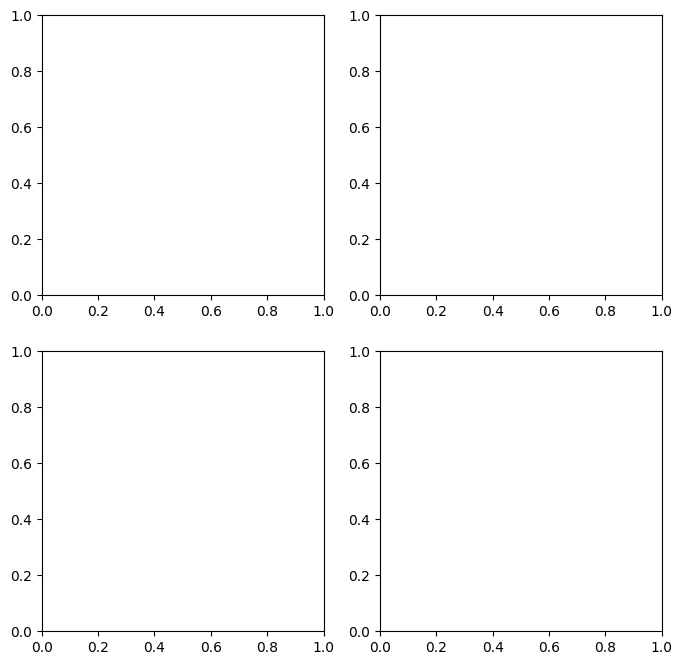

In [23]:
# Plot Difference Maps etc Comparisons....

scan_to_plot = [9228]
scan_to_plot, energy_offset = [9219, 9217, 9218, 9216, 9220, 9228], 19.75

######

delay_limit = 3000
cmap_max = 0.01
edc_sat = 0.015

E, Eint = [21.75, 21.05], 0.1 # center energies, Total width of Energy integration range
a, aint, a_full = [0, 0], 20, [-11,10]#[-11, 15]

######
######

fig, axx = plt.subplots(2, 2, height_ratios = [1,1], width_ratios = [1,1])
fig.set_size_inches(8, 8, forward=False)
axx = axx.flatten()

for s in range(0,len(scan_to_plot)):
    
    delay_i = 0
    delay_f = 3000
    res_to_plot = vars()[str('res_'+str(scan_to_plot[s]))]
    #res_to_plot = res_to_plot.assign_coords(Ekin=(res_to_plot.Ekin-19.7))
    WL = scan_info[str(scan_to_plot[s])].get("Wavelength")
    #Per = float(scan_info[str(scans[s])].get("Percent"))*0.01*1.05*max_power
    Per = -1
    Temp = scan_info[str(scan_to_plot[s])].get("Temperature")

    neg_map = res_to_plot.sel(delay = slice(-1000,-250)).sum(axis=2)
    neg_map = neg_map/np.max(neg_map)
    pos_map = res_to_plot.sel(delay = slice(0,2500)).sum(axis=2)
    pos_map = pos_map/np.max(pos_map)
    diff_map = pos_map - neg_map
    diff_map = diff_map/np.max(np.abs(diff_map))
    
    logic_mask = np.ones(diff_map.shape)
    masked_max = np.max(diff_map.sel(Ekin = slice(21,22.5))).values

    i1 = np.abs(diff_map.Ekin.values - 20.5).argmin()
    i2 = np.abs(diff_map.Ekin.values - 23).argmin()
    logic_mask[:, i1:i2] *= 1/masked_max #unmasked_max/masked_max
    
    diff_map_mask = diff_map*logic_mask
    
    ###
    res_to_plot_EDCs = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
    res_to_plot_EDCs_neg = res_to_plot_EDCs.sel(delay = slice(-700,-250)).sum(axis=1)
    res_to_plot_EDCs_pos = res_to_plot_EDCs.sel(delay = slice(delay_i, delay_f)).sum(axis=1)
    res_to_plot_EDCs_neg = res_to_plot_EDCs_neg/np.max(res_to_plot_EDCs_neg)
    res_to_plot_EDCs_pos = res_to_plot_EDCs_pos/np.max(res_to_plot_EDCs_pos)

    EDC_diff = res_to_plot_EDCs_pos - res_to_plot_EDCs_neg
    EDC_diff = 1*EDC_diff#/np.max(EDC_diff.sel(Ekin=slice(20.5,22.5)))
    
    #EDC_diff_scans[s,:] = EDC_diff
    #edc_axis[s,:] = EDC_diff.Ekin.values
    
    i11 = np.abs(res_to_plot_delay_diff.Ekin.values - 20.5).argmin()
    i22 = np.abs(res_to_plot_delay_diff.Ekin.values - 23).argmin()
    logic_mask_2[i11:i22,:] *= 1/masked_max_2 #unmasked_max/masked_max
    
    res_to_plot_delay_diff_mask = res_to_plot_delay_diff*logic_mask_2
    
    ### Plotting
    
    time_int_panel = 0
    ang_int_panel = 3
    edc_panel = 2
    dyn_panel = 1
    
    ##### PANEL 1
    res_to_plot_EDCs_neg.plot(ax=axx[edc_panel], color = 'grey', label = 'Negative delay')
    res_to_plot_EDCs_pos.plot(ax=axx[edc_panel], color = 'red', label = 'Positive delay')
    EDC_diff.plot(ax = axx[edc_panel], color = 'green', label = 'Difference', linestyle = 'dashed')
    axx[edc_panel].set_xlim(20, 22.5)
    axx[edc_panel].set_ylim(0, edc_sat)
#    axx[3*s].set_title('Scan ' + str(scans[s]) + ': ' + 'Pump = ' + str(scans_Info[scans[s]][0]) + 'nm, ' + str(scans_Info[scans[s]][1]) + 'mW. T = ' + str(scans_Info[scans[s]][2]) + ' K')
    axx[edc_panel].set_title('Scan ' + str(scan_to_plot[s]))
    axx[edc_panel].set_ylabel('Norm. Int.')
    axx[edc_panel].legend(frameon=False)
    
    delays = [150, 500, 1000, 2000]
    dint = 100
    EDC_diff_delay = np.zeros((len(delays), len(EDC_diff)))
    for d in range(0,len(delays)):
        res_to_plot_EDCs_delay = res_to_plot_EDCs.sel(delay = slice(delays[d]-dint, delays[d]+dint)).sum(axis=1)
        res_to_plot_EDCs_delay = res_to_plot_EDCs_delay/np.max(res_to_plot_EDCs_delay)

        EDC_diff_d = res_to_plot_EDCs_delay - res_to_plot_EDCs_neg
        EDC_diff_d = EDC_diff_d - np.min(EDC_diff_d.sel(Ekin=slice(21,21.8)))
        EDC_diff_d = EDC_diff_d/np.max(EDC_diff_d.sel(Ekin=slice(20.6,22.5)))
        
        EDC_diff_delay[d,:] = EDC_diff_d
        EDC_diff_d.plot(ax=axx[ang_int_panel], label = str(delays[d]))

    d = 50
    dint = 50
    pos_map_d = res_to_plot.sel(delay = slice(d-dint, d+dint)).sum(axis=2)
    pos_map_d = pos_map_d/np.max(pos_map_d)
    diff_map_d = pos_map_d - neg_map
    diff_map_d = diff_map_d/np.max(np.abs(diff_map_d))
    
    logic_mask = np.ones(diff_map_d.shape)
    masked_max = np.max(diff_map_d.sel(Ekin = slice(21,22.5))).values

    i1 = np.abs(diff_map_d.Ekin.values - 20.5).argmin()
    i2 = np.abs(diff_map_d.Ekin.values - 23).argmin()
    logic_mask[:, i1:i2] *= 1/masked_max #unmasked_max/masked_max
    
    diff_map_d = diff_map_d*logic_mask
    
    diff_map_d.plot(ax = axx[dyn_panel], add_colorbar=False, x='Angle', y='Ekin', cmap='RdBu_r', vmax = None , \
                       ylim=[18.25,22.5], xlim=[-13,13])   
        
    ##### PANEL 2
    res_to_plot_EDCs_neg.plot(ax=axx[ang_int_panel], color = 'grey', label = 'Negative delay')
            #EDC_diff.plot(ax = axx[4*s+2], color = 'green', label = 'Difference', linestyle = 'dashed')
    axx[ang_int_panel].set_xlim(20, 22.5)
    axx[ang_int_panel].set_ylim(-0.2, 1.1)
        #    axx[3*s].set_title('Scan ' + str(scans[s]) + ': ' + 'Pump = ' + str(scans_Info[scans[s]][0]) + 'nm, ' + str(scans_Info[scans[s]][1]) + 'mW. T = ' + str(scans_Info[scans[s]][2]) + ' K')
    axx[ang_int_panel].set_title('Scan ' + str(scan_to_plot[s]))
    axx[ang_int_panel].set_ylabel('Norm. Int.')
    axx[ang_int_panel].legend(frameon=False)
    axx[ang_int_panel].axvline(E[0], linestyle = 'dashed', linewidth = 1, color = 'black')
    axx[ang_int_panel].axvline(E[1], linestyle = 'dashed', linewidth = 1, color = 'black')

    ##### PANEL 3
    diff_map_mask.plot(ax = axx[time_int_panel], add_colorbar=False, x='Angle', y='Ekin', cmap='RdBu_r', vmax = None , \
                       ylim=[18.25,22.5], xlim=[-13,13])
    #diff_map.plot(ax = axx[4*s+1], add_colorbar=False, x='Angle', y='Ekin', cmap='coolwarm', vmax = None , ylim=[18.25,22.5], xlim=[-13,16])
    axx[time_int_panel].axhline(20.5, linestyle = 'solid', color = 'black', linewidth = 0.5)
    if aint < 10:
        axx[time_int_panel].axvline(a[0], linestyle = 'dashed', color = 'black')
        axx[time_int_panel].axvline(a[1], linestyle = 'dashed', color = 'black')
    axx[time_int_panel].axhline(E[0], linestyle = 'dashed', color = 'red')
    axx[time_int_panel].axhline(E[1], linestyle = 'dashed', color = 'black')
    axx[time_int_panel].set_title('Difference Map Integrated')

    #diff_map.plot(ax = axx[4*s+1], add_colorbar=False, x='Angle', y='Ekin', cmap='coolwarm', vmax = None , ylim=[18.25,22.5], xlim=[-13,16])
    axx[dyn_panel].axhline(20.5, linestyle = 'solid', color = 'black', linewidth = 0.5)
    if aint < 10:
        axx[dyn_panel].axvline(a[0], linestyle = 'dashed', color = 'black')
        axx[dyn_panel].axvline(a[1], linestyle = 'dashed', color = 'black')
    axx[dyn_panel].axhline(E[0], linestyle = 'dashed', color = 'red')
    axx[dyn_panel].axhline(E[1], linestyle = 'dashed', color = 'black')
    axx[dyn_panel].set_title('Difference Map: t = ' + str(d) + ' fs')
    
    params = {'lines.linewidth' : 2, 'axes.linewidth' : 1.5, 'axes.labelsize' : 16, 
              'xtick.labelsize' : 14, 'ytick.labelsize' : 14, 'axes.titlesize' : 16, 'legend.fontsize' : 8}
    
    plt.rcParams.update(params)
    
    fig.tight_layout()

In [24]:
from lmfit import Parameters, minimize, report_fit

def gaussian(x, amp_1, mean_1, stddev_1, offset):
    
    g1 = amp_1 * np.exp(-0.5*((x - mean_1) / stddev_1)**2)+offset
    
    return g1

def two_gaussians(x, amp_1, amp_2, mean_1, mean_2, stddev_1, stddev_2, offset):
    
    g1 = amp_1 * np.exp(-0.5*((x - mean_1) / stddev_1)**2)
    g2 = amp_2 * np.exp(-0.5*((x - mean_2) / stddev_2)**2)
    
    return g1+g2+offset

def two_gaussians_report(x, amp_1, amp_2, mean_1, mean_2, stddev_1, stddev_2, offset):
    
    g1 = amp_1 * np.exp(-0.5*((x - mean_1) / stddev_1)**2)
    g2 = amp_2 * np.exp(-0.5*((x - mean_2) / stddev_2)**2)
    
    return g1,g2,offset

def objective(params, x, data):
    
    g1, g2, offset = two_gaussians(x, **params)
    fit = g1+g2+offset
    resid = np.abs(data-fit)**2
    
    return resid

In [25]:
# Define Fit Parameters

fit_params = Parameters()
fit_params.add("amp_1", value=1, min=0, max=2, vary=True)
fit_params.add("amp_2", value=.25, min=0.075, max=1, vary=True)
fit_params.add("mean_1", value=1.1, min=.95, max=1.25, vary=True)
fit_params.add("mean_2", value=1.79, min=1.77, max=2.05, vary=True)
fit_params.add("stddev_1", value=0.1, min=0.055, max=0.135, vary=True)
fit_params.add("stddev_2", value=0.06, min=0.035, max=0.12, vary=True)
fit_params.add("offset", value=0.00, min=0, max=0.01, vary=True)

start_e = 0.8
#_, _, start, _ = data_handler.get_closest_indices(0, 0, start_e, 0)
stop_e = 2.5
#_, _, stop, _ = data_handler.get_closest_indices(0, 0, stop_e, 0)

N = 3

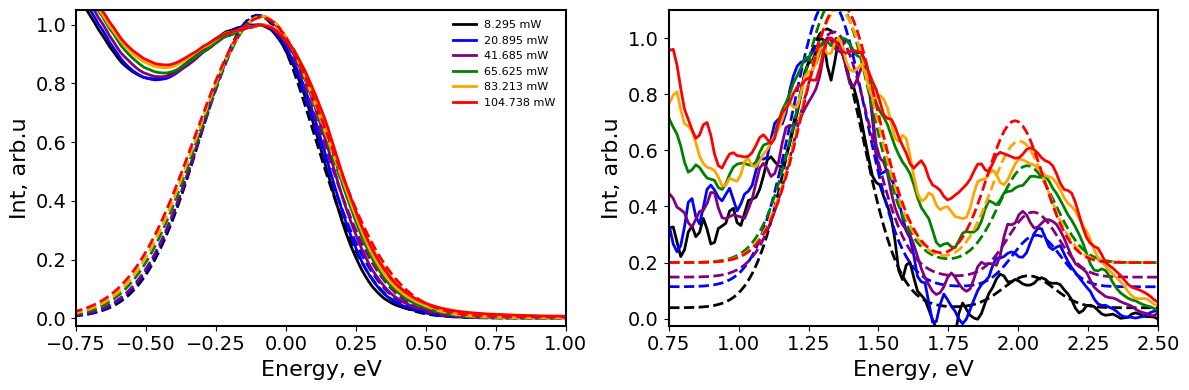

In [138]:
# Extract EDCs and Fit....

scans_, energy_offset = [9219, 9217, 9218, 9216, 9220, 9228], 19.75

delay_limit = 3000
cmap_max = 0.01
edc_sat = 0.015

E, Eint = [21.75, 21.05], 0.1 # center energies, Total width of Energy integration range
a, aint, a_full = [0, 0], 20, [-11,10] # [-11, 15]

######
######

fig, axx = plt.subplots(1, 2, height_ratios = [1], width_ratios = [1,1])
fig.set_size_inches(12, 4, forward=False)
axx = axx.flatten()

colors = ['black', 'blue', 'purple', 'green', 'orange', 'red']

fits_excited = np.zeros((len(scans),2))
fits_vb = np.zeros((len(scans)))

fits_vb_err = np.zeros((len(scans)))
fits_excited_err = np.zeros((len(scans),2))

for s in range(0,len(scans_)):
    
    delay_i = -50
    delay_f = 500
    res_to_plot = vars()[str('res_'+str(scans_[s]))]
    #res_to_plot = res_to_plot.assign_coords(Ekin=(res_to_plot.Ekin-19.7))
    WL = scan_info[str(scans_[s])].get("Wavelength")
    #Per = float(scan_info[str(scans[s])].get("Percent"))*0.01*1.05*max_power
    Per = -1
    Temp = scan_info[str(scans_[s])].get("Temperature")
    
    ###
    EDCs = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
    
    EDCs_neg = EDCs.sel(delay = slice(-700,-350)).mean(axis=1)
    EDCs_neg = EDCs_neg/np.max(EDCs_neg)
    
    EDCs_pos = EDCs.sel(delay = slice(0, delay_f))#.sum(axis=1)
    EDCs_pos = EDCs_pos/np.max(EDCs_pos)
    
    EDCs_pos_sum = EDCs.sel(delay = slice(delay_i, delay_f)).mean(axis=1)
    EDCs_pos_sum = EDCs_pos_sum/np.max(EDCs_pos_sum)

    EDCs_diff_sum = EDCs_pos_sum - EDCs_neg
    EDCS_diff_delays = EDCs_pos - EDCs_neg
    edc_axis = EDC_diff.Ekin.values
    
    ########################################################################
    ########################################################################
    # VBM
    
    edc = res_to_plot.sel(Angle = slice(-5,-1)).sum(axis=(0,2)) #EDCs.sum(axis = 1) #EDCs_diff_sum
    energy_axis = edc_axis - 19.72

    trunc_e = -0.2
    trunc1 = np.abs(energy_axis - trunc_e).argmin()
    trunc_e2 = 0.75
    trunc2 = np.abs(energy_axis - trunc_e2).argmin()

    p0 = [1, .1, .2, 0] # Fitting params initial guess [amp, center, width, offset]
    bnds = ((0.5, -0.5, 0.0, 0), (1.2, 0.5, .6, .2))
    popt, pcov = curve_fit(gaussian, energy_axis[trunc1:trunc2], edc[trunc1:trunc2]/np.max(edc[trunc1:]), p0, method=None, bounds = bnds)
    fits_vb[s] = popt[1]
    gauss_fit = gaussian(energy_axis,*popt)
    
    # Calculate the standard errors
    perr = np.sqrt(np.diag(pcov))
    fits_vb_err[s] = perr[1]

    axx[0].plot(energy_axis, edc/np.max(edc[trunc1:]),  label = str(round(power[s],3))+' mW', linestyle = '-', color = colors[s])
    axx[0].plot(energy_axis, gauss_fit, color = colors[s], linestyle = 'dashed')

    axx[0].set_xlim([-0.75, 1])
    axx[0].set_ylim([-0.025, 1.05])    
    axx[0].legend(frameon=False)
    axx[0].set_xlabel('Energy, eV')
    axx[0].set_ylabel('Int, arb.u')
    
    ########################################################################
    # excited states
    
    edc = EDCs_diff_sum

    trunc_e = 1.1
    trunc1 = np.abs(energy_axis - trunc_e).argmin()
    trunc_e2 = 2.4
    trunc2 = np.abs(energy_axis - trunc_e2).argmin()
    
    p0 = [4, 1, 1.3, 2.1, .1, 0.08, .2] # Fitting params initial guess [amp, center, width, offset]
    bnds = ((0.2, 0.01, 1.2, 1.7, 0.02, 0.04, 0), (5, 2, 1.65, 2.5, .13, 0.1, 0.2))
    popt, pcov = curve_fit(two_gaussians, energy_axis[trunc1:trunc2], edc[trunc1:trunc2]/np.max(edc[trunc1-10:]), p0, method=None, bounds = bnds)
    perr = np.sqrt(np.diag(pcov))
    
    fits_excited[s,:] = popt[2:3+1]
    fits_excited_err[s,:] = perr[2:3+1]

    gauss_fit = two_gaussians(energy_axis,*popt)
    edc = edc/np.max(edc[150:220])

    axx[1].plot(energy_axis, edc/np.max(edc[trunc1-10:]),  label = str(round(power[s],3))+' mW', linestyle = '-', color = colors[s])
    axx[1].plot(energy_axis, gauss_fit, color = colors[s], linestyle = 'dashed')

    axx[1].set_xlim([0.75, 2.5])
    axx[1].set_ylim([-0.025, 1.1])
    #axx[1].legend()
    #axx[2].axvline(2, linestyle = 'dashed', color = 'grey')
    axx[1].set_xlabel('Energy, eV')
    axx[1].set_ylabel('Int, arb.u')

    params = {'lines.linewidth' : 2, 'axes.linewidth' : 1.5, 'axes.labelsize' : 16, 
              'xtick.labelsize' : 14, 'ytick.labelsize' : 14, 'axes.titlesize' : 16, 'legend.fontsize' : 8}
    plt.rcParams.update(params)

fig.tight_layout()

In [139]:
fits_vb

array([-0.10168889, -0.0975953 , -0.08947047, -0.08611202, -0.0867134 ,
       -0.08796772])

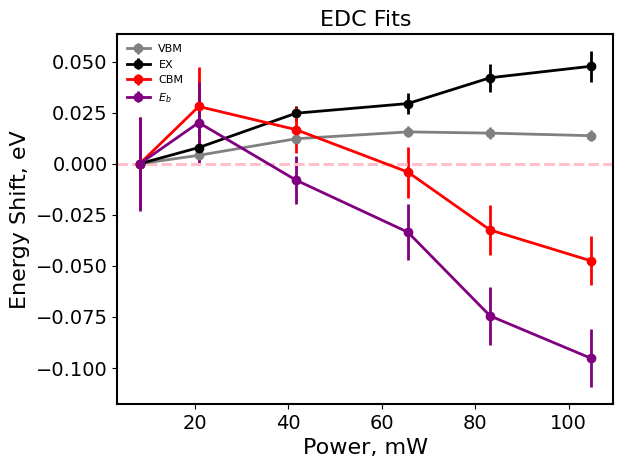

In [144]:
vb_shift = fits_vb-fits_vb[0]
ex_shift = fits_excited[:,0]- fits_excited[0,0]
cb_shift = fits_excited[:,1] - fits_excited[0,1]

#plt.plot(power, vb_shift, label = 'VBM', color = 'grey', marker = 'o')
#plt.plot(power, ex_shift, label = 'EX',  marker = 'o', color = 'black')
#plt.plot(power, cb_shift, label = 'CB', marker = 'o', color = 'red')

plt.errorbar(power, (vb_shift), yerr=fits_vb_err, marker = 'o', color = 'grey', label = 'VBM')
plt.errorbar(power, ex_shift, yerr=fits_excited_err[:,0], marker = 'o', color = 'black', label = 'EX')
plt.errorbar(power, cb_shift, yerr=fits_excited_err[:,1], marker = 'o', color = 'red', label = 'CBM')

eb_shift = fits_excited[:,1] - fits_excited[:,0]
eb_shift = eb_shift -  eb_shift[0]
#plt.plot(power, eb_shift, label = '$E_{b}$', color = 'purple', marker = 'o')
plt.errorbar(power, eb_shift, yerr=(np.sqrt(fits_excited_err[:,0]**2+fits_excited_err[:,1]**2)), marker = 'o', color = 'purple', label = '$E_{b}$')
plt.axhline(0, linestyle = 'dashed', color = 'pink')
plt.xlabel('Power, mW')
plt.ylabel('Energy Shift, eV')
plt.title('EDC Fits')
plt.legend(frameon=False)

plt.axhline(0, linestyle = 'dashed', color = 'pink')
plt.xlabel('Power, mW')
plt.ylabel('Energy Shift, eV')
plt.title('EDC Fits')
plt.legend(frameon=False)

In [142]:
vb_shift.shape

(6,)

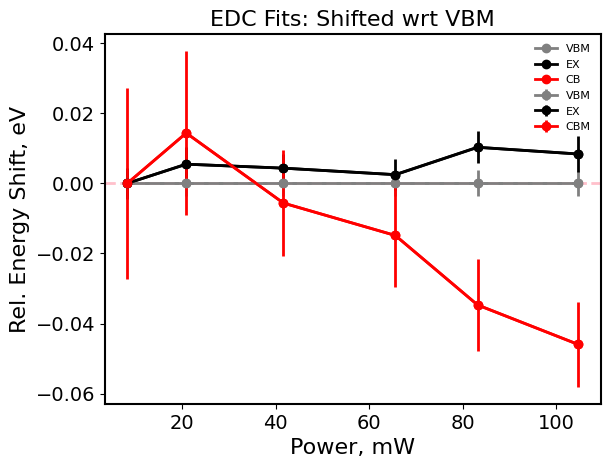

In [29]:
vb_shift = fits_vb[:] - fits_vb[0]
ex_shift = [fits_excited[s,0] - fits_excited[0,0] - vb_shift[s] for s in np.arange(len(power))]
cb_shift = [fits_excited[s,1] - fits_excited[0,1] - vb_shift[s] for s in np.arange(len(power))]
vb_shift = [fits_vb[s] - fits_vb[0] - vb_shift[s] for s in np.arange(len(power))]

plt.plot(power, vb_shift, label = 'VBM', color = 'grey', marker = 'o')
plt.plot(power, ex_shift, label = 'EX',  marker = 'o', color = 'black')
plt.plot(power, cb_shift, label = 'CB', marker = 'o', color = 'red')

plt.errorbar(power, np.squeeze(vb_shift), yerr=fits_vb_err, marker = 'o', color = 'grey', label = 'VBM')
plt.errorbar(power, np.squeeze(ex_shift), yerr=fits_excited_err[:,0], marker = 'o', color = 'black', label = 'EX')
plt.errorbar(power, np.squeeze(cb_shift), yerr=fits_excited_err[:,1], marker = 'o', color = 'red', label = 'CBM')

plt.axhline(0, linestyle = 'dashed', color = 'pink')
plt.xlabel('Power, mW')
plt.ylabel('Rel. Energy Shift, eV')
plt.title('EDC Fits: Shifted wrt VBM')
plt.legend(frameon=False)

In [79]:
fits_excited

array([[1.31635696, 2.01958782],
       [1.32652345, 2.06647316],
       [1.34028693, 2.06117289],
       [1.34418913, 2.02696251],
       [1.36649471, 1.99553689],
       [1.37025966, 1.98311287]])

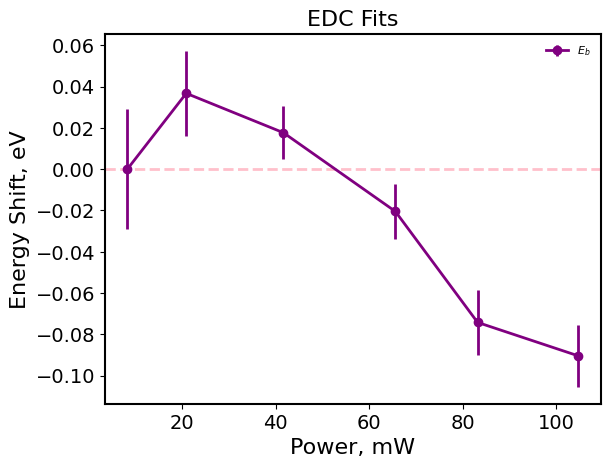

In [78]:
vb_shift = fits_vb-fits_vb[0]
ex_shift = fits_excited[:,0]- fits_excited[0,0]
cb_shift = fits_excited[:,1] - fits_excited[0,1]

eb_shift = fits_excited[:,1] - fits_excited[:,0]
eb_shift = eb_shift -  eb_shift[0]

#plt.plot(power, eb_shift, label = '$E_{b}$', color = 'purple', marker = 'o')
plt.errorbar(power, eb_shift, yerr=(np.sqrt(fits_excited_err[:,0]**2+fits_excited_err[:,1]**2)), marker = 'o', color = 'purple', label = '$E_{b}$')
plt.axhline(0, linestyle = 'dashed', color = 'pink')
plt.xlabel('Power, mW')
plt.ylabel('Energy Shift, eV')
plt.title('EDC Fits')
plt.legend(frameon=False)

-0.1232799393143194
0.003666149188197337
-0.12026070914695534
0.003871783210225216
-0.12108901544487302
0.003409749914529641
-0.12194871477172169
0.0034255218020362538
-0.12046233656083832
0.0036434263915188186
-0.12441180121252512
0.003532864269514566
-0.12199832618182518
0.00385988217730264
-0.12058500278756745
0.003723492833560892
-0.12037300101937927
0.003734630867196425
-0.12146837623511245
0.003658219268238965
-0.12128087593884627
0.003527208582960517


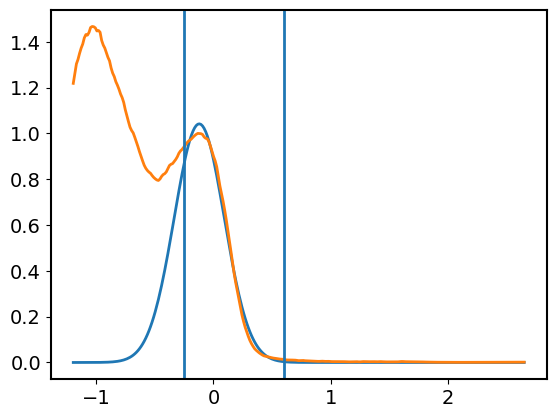

[ 1.04174708e+00 -1.21280876e-01  2.13087853e-01  3.15652249e-16]
-0.12172054994787265
0.0038695367331262674
-0.12076946819219089
0.0037338881705951026
-0.1218974578200868
0.003590715241932775
-0.12103103653233759
0.003474463036491359
-0.12321858628664355
0.0034620196994456206
-0.1217892649681209
0.003869093914420532
-0.12301419564290299
0.0038166771089565153
-0.12078155661130238
0.0035649497281864764
-0.12419571318010897
0.0037122575025805137
-0.1227301657920622
0.003530125218948315


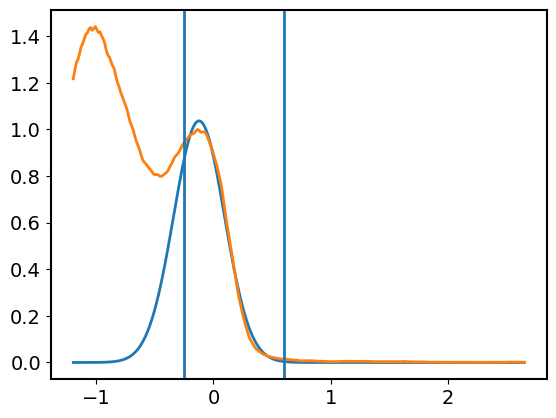

[ 1.03707136e+00 -1.22730166e-01  2.16461664e-01  8.60301182e-17]
-0.12438910061681253
0.003987306974898139
-0.12043382240347399
0.0034623454279704494
-0.12152134611766294
0.0036519477835295377
-0.1227788568504257
0.0036344797393604153
-0.12412456631093395
0.00397168006265162
-0.12194048407281095
0.003723794297378767
-0.12177239059092644
0.003434038011641612
-0.1201281206762772
0.0036905828214058066
-0.12224813826699155
0.0038107721699921744
-0.120604048355474
0.0036055246858640666
-0.12287292293181294
0.0036433096167300533
-0.12554152153243844
0.003651164351090143
-0.12069764869933754
0.003565547165618262
-0.12022673327084461
0.003441874122970199
-0.12316690035455065
0.0037948820874529297
-0.12199919913326719
0.0036871336583860544
-0.1219054549258078
0.0038857909954545483
-0.12330651460419678
0.0036752923093486605
-0.12166629148358929
0.0036673060554456766
-0.12268601164683596
0.003511647012867388
-0.12003563100956786
0.0034729509403501487
-0.12475161470001016
0.0035929204078479593
-0

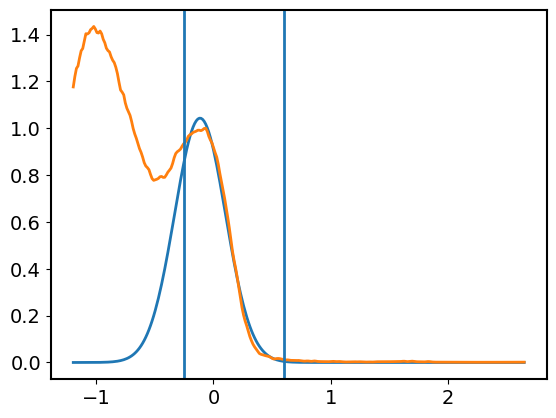

[ 1.04324989e+00 -1.14354300e-01  2.16998451e-01  1.33145156e-14]
-0.1148605607933038
0.004125766395879776
-0.11448621479047907
0.003659522152689111
-0.11400860379328293
0.0038317983034156277
-0.11921625855439098
0.0034705133818371415
-0.1185919046069369
0.0037617395667488705
-0.11893945268986703
0.003585239418509919
-0.11505557430986069
0.003732356951209565
-0.11887747587618093
0.003654900632995314
-0.11841482293128351
0.0035644257575246463
-0.11619823213679949
0.0037550836760185426


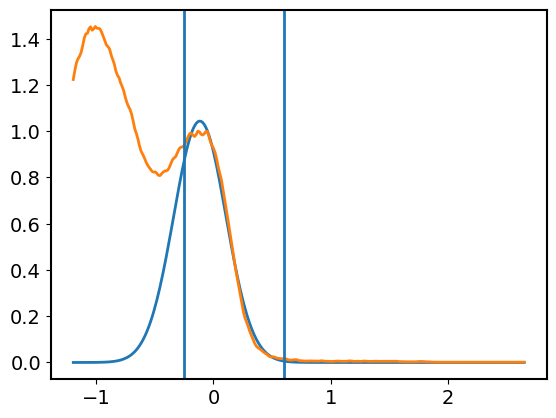

[ 1.04394322e+00 -1.16198232e-01  2.22521369e-01  2.40293955e-14]
-0.11831739167699738
0.0030149588576108884
-0.1200036030114722
0.003959228106335176
-0.11696849746502003
0.003061394435647631
-0.1210771896379061
0.0035868014172796576
-0.11871954791506092
0.0037315233036415824
-0.11426856840613546
0.0035785016568039493
-0.11311539722338292
0.0034369317290559058
-0.11757000842387388
0.003347752638791121
-0.11694686623600505
0.0032759465165521206
-0.11627973743999788
0.0030250341205493828
-0.12118063467047097
0.003938589240843774
-0.112215262180468
0.0029913077334185498
-0.11362454126604161
0.003673378609296913
-0.11901413012895232
0.0042735493573149205
-0.11781269692118325
0.003961295711756966
-0.11402405161629789
0.00340628880837046
-0.11560800180053475
0.0034371489515825837
-0.11775063656907678
0.003238666329298068
-0.11625980428158447
0.0034499733506374113
-0.1171940460202903
0.0034157635327456697
-0.11756003862696374
0.00321595127452833
-0.11353839938476104
0.003756775716824558
-0.11

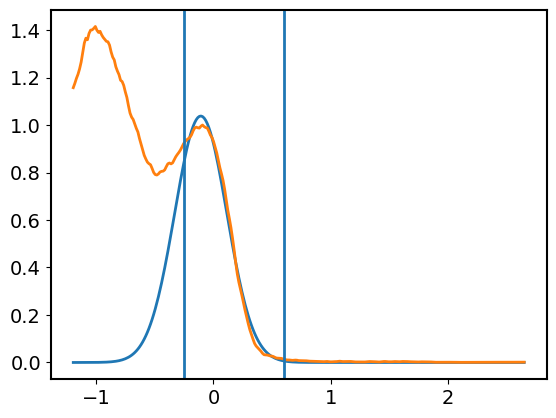

[ 1.03794377e+00 -1.08162853e-01  2.21932485e-01  3.95660767e-15]
-0.10773837231085037
0.0037817103494653262
-0.10377625742666653
0.003633415393424126
-0.11006849676663788
0.00402313970606458
-0.11049211844215535
0.0034967301827315165
-0.11327062200421718
0.003914445063686376
-0.11453525951990799
0.003757136260484002
-0.11141668984975292
0.00414522948722036
-0.1095943189313187
0.003353105912143034
-0.11444924664310675
0.0036333737084890353
-0.10967522800481658
0.0036035333858381842


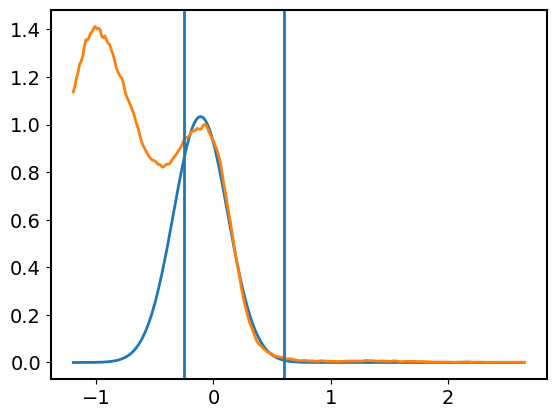

[ 1.03363710e+00 -1.09675228e-01  2.30826795e-01  2.30240006e-15]
-0.10906347691680718
0.0035589543191082663
-0.10930651586025948
0.0037400496276463156
-0.10771834912215801
0.004123743710214096
-0.1095616727663437
0.0038044889881582306
-0.10976775744916185
0.003697481617856015
-0.11417072809721296
0.004202460018565021
-0.10855770880486033
0.003877352185269906
-0.11493510046177653
0.0033603696316796628
-0.10856443075026845
0.003698725374982546
-0.11147452581726747
0.003676794377714615
-0.10991063363728369
0.003338089148018023
-0.1058777632229654
0.003310611389944915
-0.10623526194825812
0.003397399418978141
-0.11174073177269685
0.003421411805749631
-0.10737692891654098
0.0036117403185645216
-0.10522773646216772
0.0035928444291907155
-0.11039908585716249
0.0035690149148465446
-0.1098167116679244
0.003642486117998039
-0.1070019829539044
0.003944125898696445
-0.111706303714
0.003850377217160232
-0.10740871824725132
0.0036305952845336973
-0.10846403256319546
0.0037490365417983847
-0.1063331

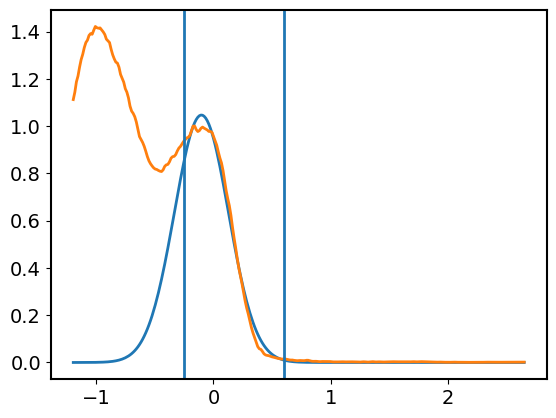

[ 1.04689595e+00 -1.02485823e-01  2.30255334e-01  3.73837816e-18]
-0.10138347863350533
0.0038109045192020827
-0.09840865765338577
0.004405861441318875
-0.10165437045806613
0.004256540358895392
-0.10408025359068486
0.003706575433893425
-0.10748082150083604
0.0041147843063658275
-0.11155041240038059
0.0034315115428121836
-0.10963022489021755
0.003270924523096474
-0.1123177288632352
0.003382671083434716
-0.10942764545488377
0.0032920512947331674
-0.11231285509516459
0.00332489990199417


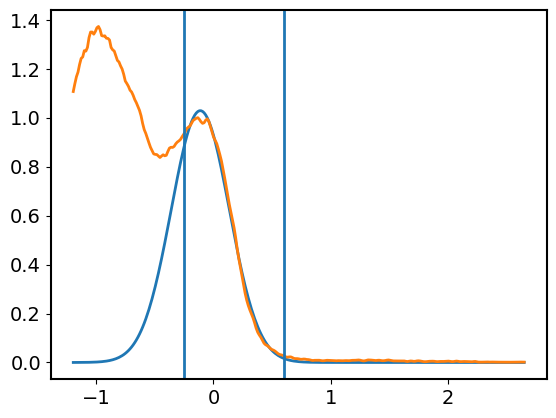

[ 1.02875010e+00 -1.12312855e-01  2.47717458e-01  1.42996165e-16]
-0.1132484346888295
0.0033058076519425286
-0.10886151506981795
0.0034898996032996944
-0.11420770648371767
0.004039006429812639
-0.11385813807882222
0.0033891159876865643
-0.1114269887518152
0.0033857701653447338
-0.10892605907022881
0.003261717364870325
-0.10589657620424986
0.003939984856314035
-0.10690205810996171
0.0035205024268339753
-0.10138000770031697
0.003391160832291197
-0.10470026083653759
0.0036903705297435816
-0.10595830812475211
0.0037265555685344755
-0.10588875218703597
0.0033508858617539825
-0.10146265456286972
0.00352307304765446
-0.10574469300847657
0.004108783993628679
-0.10551266108061598
0.0032045670990140133
-0.10406538746009325
0.003526927217766979
-0.10574923924624946
0.004053274308215514
-0.10693023165343779
0.003844828415650537
-0.10646184754981651
0.0034881646930047553
-0.10522905059282867
0.003780211354601533
-0.10414532654336182
0.0033793995495605958
-0.10434056150155135
0.0037096004466170723
-

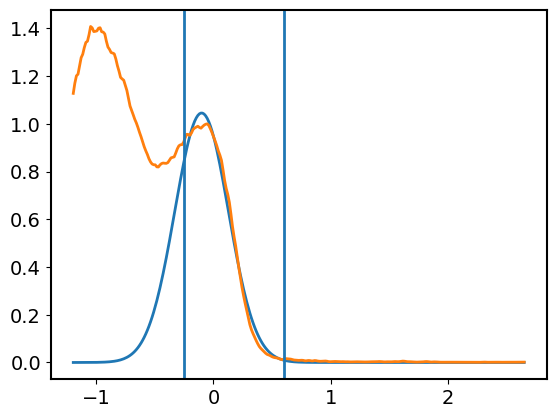

[ 1.04560754e+00 -1.00919308e-01  2.28384957e-01  4.15214881e-14]
-0.10033220628673192
0.0039155772730187065
-0.09680527635296528
0.004316984398307421
-0.10600146732474258
0.004440027795853349
-0.09927769185114241
0.004036634662195196
-0.10393093489659054
0.0038869617326729214
-0.10892027876825407
0.003979315177484271
-0.11026400927322287
0.0036104060977959042
-0.11725836306383544
0.004903608435930522
-0.10407298696797733
0.0036174796249381644
-0.11143931285116156
0.004256677107674698


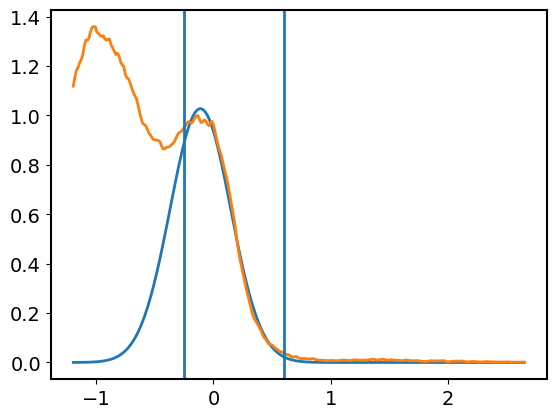

[ 1.02759699e+00 -1.11439313e-01  2.57624805e-01  1.43764360e-17]
-0.11212216876147156
0.0039880050449502165
-0.10832492688255557
0.004144741280257439
-0.11054614676335833
0.004046088701979819
-0.11063293433553832
0.0033832787422336235
-0.10804006745670165
0.003413633631804273
-0.10793743040737916
0.0034782266501884934
-0.11283013354741589
0.003760822896504673
-0.11200761603963648
0.0038266050867943667
-0.10928497161037175
0.0040781411738018535
-0.10893389446545801
0.004290298866460586
-0.10847781051223668
0.0041333737793447034
-0.10312714501600298
0.0038361769417509916
-0.10979535863412529
0.0036974643803041277
-0.10717292606827379
0.00420024059969933
-0.10855444109611051
0.0035404135043249994
-0.11413030334242844
0.004359171361448035
-0.11254519014190312
0.003884622913017102
-0.10190891424016342
0.0038274836426735776
-0.10885844329351095
0.003916618234913464
-0.10914898241393983
0.0033485832725342014
-0.10812787770065134
0.0037636921909565547
-0.11008389825446584
0.003712637565679325

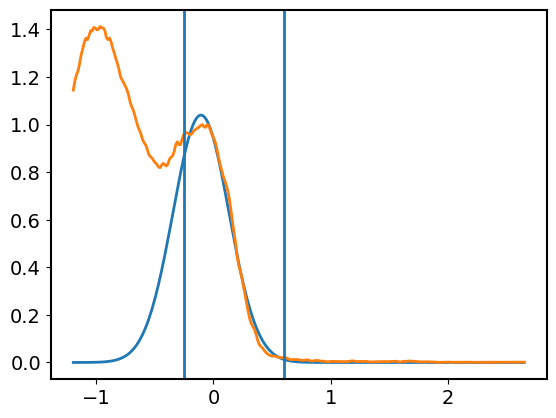

[ 1.03968086e+00 -1.06420795e-01  2.38241583e-01  3.07210971e-18]
-0.10481665440146516
0.004028584135873426
-0.0984489848265545
0.004403567017279614
-0.10294587102329697
0.004327953179795973
-0.10368084702137516
0.004424856154461779
-0.11297188156227667
0.004211075703105321
-0.11887145711454022
0.003836670314062596
-0.11124697923849768
0.003454263862446149
-0.11462451020101293
0.0037676522621428307
-0.10937143472448846
0.0036329759508060516
-0.11709645369246907
0.004556361100056416


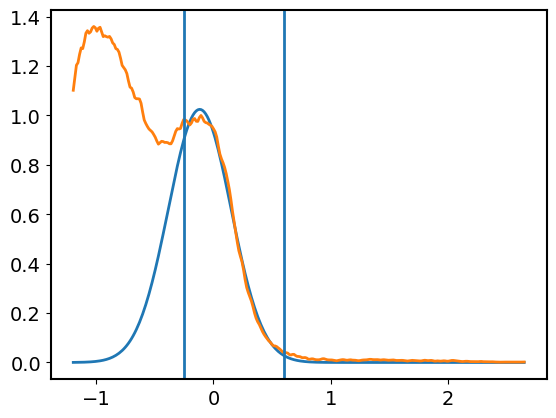

[ 1.02469166e+00 -1.17096454e-01  2.67346550e-01  9.77591342e-14]
-0.11091147652595235
0.0036000211164346437
-0.1183560872937512
0.004237068612646234
-0.11458725251386757
0.004625415329912108
-0.11460054199927051
0.0032198376660271763
-0.11210252046195401
0.0034454652674883643
-0.11208335586701991
0.0033086228213482665
-0.10799438312215093
0.003888040140536683
-0.11305494741578753
0.0038583876024499077
-0.11254862449195871
0.004232163898069495
-0.10640379146171097
0.0036655433057693936
-0.10998499203090585
0.003637133769878112
-0.11249082428299012
0.003971016714962193
-0.10755186186494628
0.003884488018906679
-0.10855341637480362
0.0038681035775091437
-0.10805872440467648
0.003469140038923483
-0.11267968197014729
0.0037422832213997045
-0.11056038506869148
0.0036294457640957604
-0.10716130719672516
0.003376680653497431
-0.1051423250300011
0.004362519003025135
-0.10716456894478449
0.0038283820087736437
-0.10848381310640458
0.0034318109856220384
-0.10851582675329943
0.004520784198655196
-

In [186]:
# Extract EDCs and Fit.... + TEST CASES

scans_, energy_offset = [9219, 9217, 9218, 9216, 9220, 9228], 19.72

delay_limit = 3000
cmap_max = 0.01
edc_sat = 0.015

E, Eint = [21.75, 21.05], 0.1 # center energies, Total width of Energy integration range
a, aint, a_full = [0, 0], 20, [-10,10] # [-11, 15]

######
######

colors = ['black', 'blue', 'purple', 'green', 'orange', 'red']

fits_vb_delay = np.zeros((len(scans),67))
fits_vb_width = np.zeros((len(scans),67))

fits_excited_delay = np.zeros((len(scans),67,2))
fits_excited_all = np.zeros((len(scans),67,7))

fits_vb_delay_err = fits_vb_delay
fits_excited_delay_err = fits_excited_delay

for s in range(0,len(scans_)):
    
    #EXTRACT EDCS
    delay_i = 0
    delay_f = 3000
    res_to_plot = vars()[str('res_'+str(scans_[s]))]
    #res_to_plot = res_to_plot.assign_coords(Ekin=(res_to_plot.Ekin-19.7))
    WL = scan_info[str(scans_[s])].get("Wavelength")
    #Per = float(scan_info[str(scans[s])].get("Percent"))*0.01*1.05*max_power
    Per = -1
    Temp = scan_info[str(scans_[s])].get("Temperature")
    
    ###
    EDCs = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
    
    EDCs_neg = EDCs.sel(delay = slice(-700,-250)).sum(axis=1)
    EDCs_neg = EDCs_neg/np.max(EDCs_neg)
    
    EDCs_pos = EDCs.sel(delay = slice(-300, delay_f))#.sum(axis=1)
    EDCs_pos = EDCs_pos/np.max(EDCs_pos)
    
    EDCs_pos_sum = EDCs.sel(delay = slice(-300, delay_f)).sum(axis=1)
    EDCs_pos_sum = EDCs_pos_sum/np.max(EDCs_pos_sum)

    EDCs_diff_sum = EDCs_pos_sum - EDCs_neg
    EDCs_diff_delays = EDCs_pos - EDCs_neg
    edc_axis = EDC_diff.Ekin.values
    
    ########################################################################
    ########################################################################
    
    ### VBM
    
    energy_axis = edc_axis - 19.72

    for d in range(0,(EDCs_diff_delays.shape[1])):
        
        edc = res_to_plot.loc[{"Angle":slice(-5,-1)}].sum(axis=(0))
        edc = np.mean(edc[:, d:d+1], axis = 1)

        trunc_evbm = -0.25
        trunc1 = np.abs(energy_axis - trunc_evbm).argmin()
        trunc_evbm2 = 0.6
        trunc2 = np.abs(energy_axis - trunc_evbm2).argmin()

        p0 = [1, -.1, .3, 0] # Fitting params initial guess [amp, center, width, offset]
        bnds = ((0.5, -1, 0.0, 0), (1.4, 0.6, 1, .5))
        popt, pcov = curve_fit(gaussian, energy_axis[trunc1:trunc2], edc[trunc1:trunc2]/np.max(edc[trunc1:]), p0, method=None, bounds = bnds)
        fits_vb_delay[s,d] = popt[1]
        fits_vb_width[s,d] = popt[2]

        perr = np.sqrt(np.diag(pcov))
        fits_vb_delay_err[s,d] = perr[1]
        
        gauss_fit = gaussian(energy_axis,*popt)
        print(popt[1])
        print(fits_vb_delay[s,d])
              
        if d == 10 or d == 20:
            plt.plot(energy_axis, gauss_fit)
            plt.plot(energy_axis, edc/np.max(edc[trunc1:]))
            plt.axvline(trunc_evbm2)
            plt.axvline(trunc_evbm)
            plt.show()
            print(popt)

        ########################################################################
        ### EXCITED STATES

        edc = np.mean(EDCs_diff_delays[:,d:d+1], axis=1)#EDCs_diff_sum

        trunc_e = 1.2
        trunc3 = np.abs(energy_axis - trunc_e).argmin()
        trunc_e2 = 2.4
        trunc4 = np.abs(energy_axis - trunc_e2).argmin()

        p0 = [4, 1,  1.3, 2.1, .5, 0.08,  .05] # Fitting params initial guess [amp, center, width, offset]
        bnds = ((0.2, 0.01,  1.2, 1.5,  0.02, 0.03,  0), (5, 2,  1.65, 2.5,  1, 1,  0.3))

        popt_cb, pcov = curve_fit(two_gaussians, energy_axis[trunc3:trunc4], edc[trunc3:trunc4]/np.max(edc[trunc3-2:]), p0, method=None, bounds = bnds)
        fits_excited_all[s,d,:] = popt_cb[:]
        fits_excited_delay[s,d,:] = popt_cb[2:3+1]
        
        perr = np.sqrt(np.diag(pcov))
        fits_excited_delay_err[s,d,:] = perr[2:3+1]
        
        gauss_fit = two_gaussians(energy_axis,*popt_cb)
    

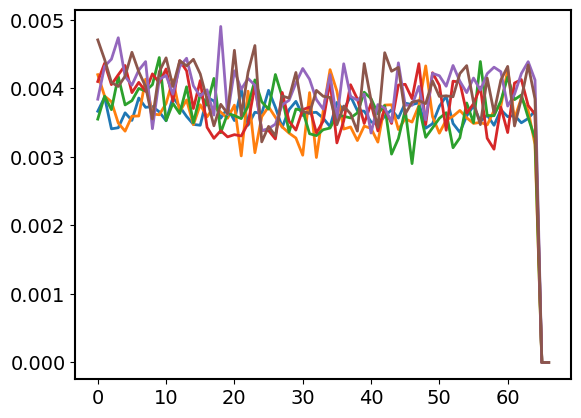

In [187]:
for i in range(len(scans)):
    plt.plot(fits_vb_delay[i,:])

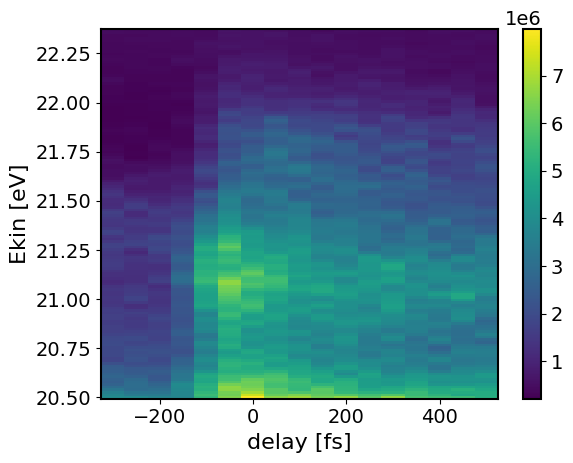

In [146]:
res.loc[{"delay":slice(-500,500), "Ekin":slice(20.5,24), "Angle":slice(-10,10)}].sum(dim="Angle").plot.imshow()

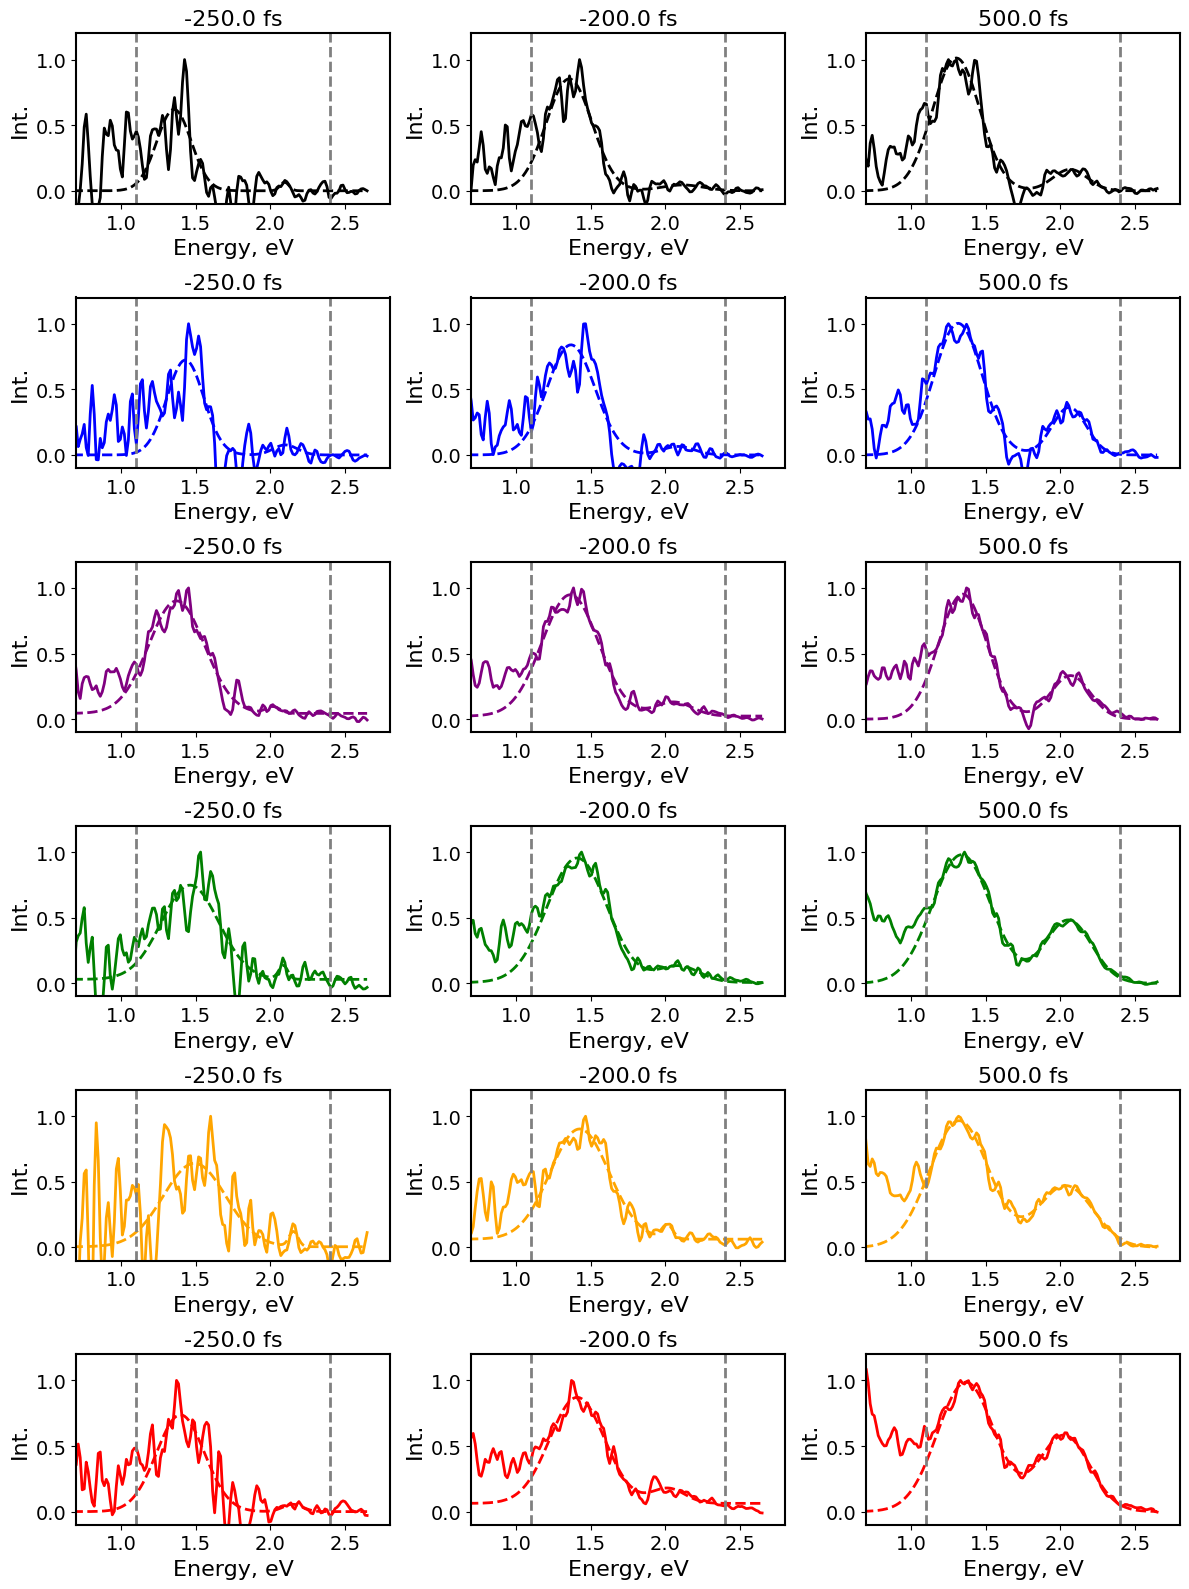

In [147]:
fig, axx = plt.subplots(6, 3)
fig.set_size_inches(12, 16, forward=False)
ax = axx.flatten()

test_cases = [-250, -200, 500]
D = len(test_cases)

for dd in np.arange(0,len(test_cases)):
    for s in np.arange(0,len(power)):

        d = np.abs(test_cases[dd]-EDCs_diff_delays.delay.values).argmin()
        res_to_plot = vars()[str('res_'+str(scans_[s]))]
        delays = EDCs_diff_delays.delay.values

        ###
        EDCs = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
        EDCs_neg = EDCs.sel(delay = slice(-700,-250)).sum(axis=1)
        EDCs_neg = EDCs_neg/np.max(EDCs_neg)
        EDCs_pos = EDCs.sel(delay = slice(-300, delay_f))#.sum(axis=1)
        EDCs_pos = EDCs_pos/np.max(EDCs_pos)
        EDCs_diff_delays = EDCs_pos - EDCs_neg

        edc_axis = EDC_diff.Ekin.values
        energy_axis = edc_axis - 19.72
        edc = np.mean(EDCs_diff_delays[:,d:d+3], axis=1)
        trunc_e = 1.1
        trunc1 = np.abs(energy_axis - trunc_e).argmin()
        trunc_e2 = 2.4
        trunc2 = np.abs(energy_axis - trunc_e2).argmin()

        gauss_fit = two_gaussians(energy_axis, *fits_excited_all[s,d,:])

        ax[dd+s*D].plot(energy_axis, edc/np.max(edc[trunc1-2:]), linestyle = '-', color = colors[s])
        ax[dd+s*D].plot(energy_axis, gauss_fit, linestyle = 'dashed', color = colors[s])
        ax[dd+s*D].set_title(str(round(delays[d],1)) + ' fs')
        ax[dd+s*D].set_ylim([-0.1, 1.2])
        ax[dd+s*D].set_xlim([.7, 2.8])
        ax[dd+s*D].set_ylabel('Int.')
        ax[dd+s*D].set_xlabel('Energy, eV')
        ax[dd+s*D].axvline(trunc_e, linestyle = '--', color = 'grey')
        ax[dd+s*D].axvline(trunc_e2, linestyle = '--', color = 'grey')

fig.tight_layout()

In [148]:
fits_vb_width.shape

(6, 67)

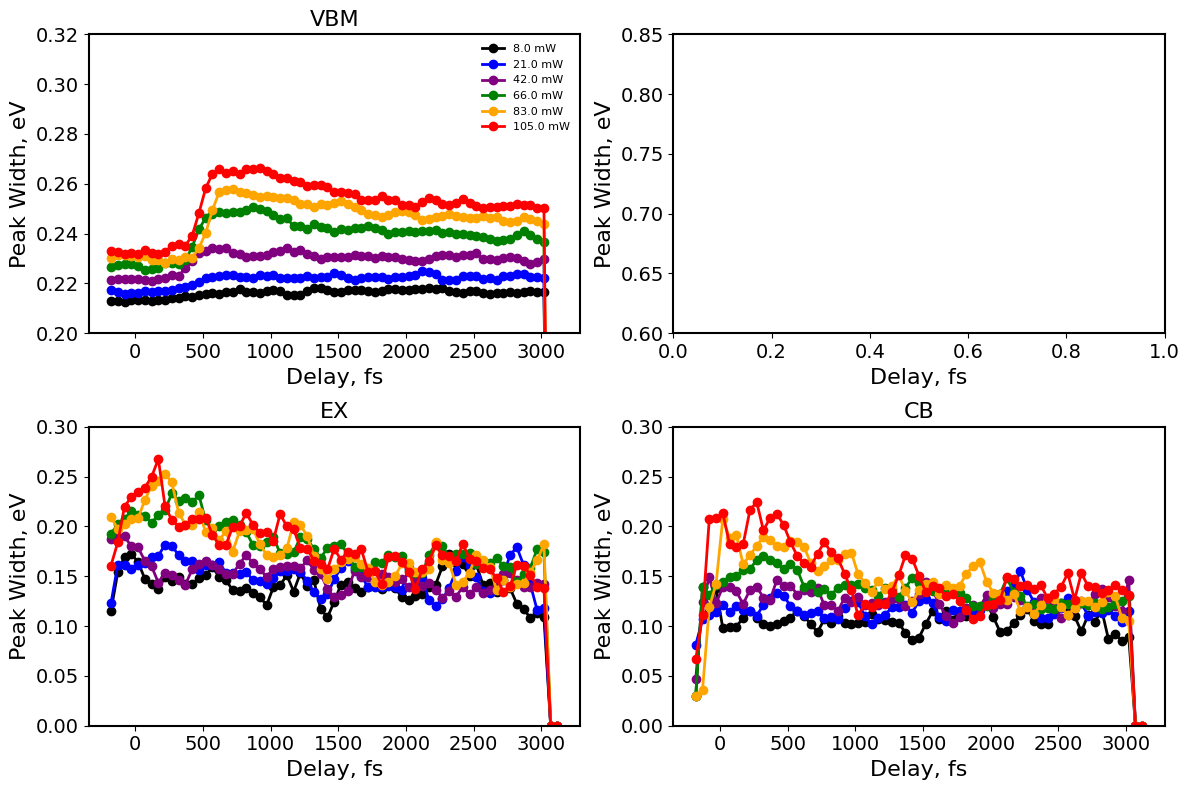

In [149]:
### PLOT THE FITS: THIS PLOTS THE PEAK WIDTH

fig, axx = plt.subplots(2, 2, height_ratios = [1,1], width_ratios = [1,1])
fig.set_size_inches(12, 8, forward=False)
ax = axx.flatten()
delay_f = 4000

for s in np.arange(len(power)):
    res = vars()[str('res_'+str(scans_[s]))]
    res = res.sel(delay = slice(-350, delay_f))
    ax_delay = res.delay.values + 120
    t0 = np.abs(ax_delay - 0).argmin()
    
    vb_shift = fits_vb_width[s,:]# - np.mean(fits_vb_width[s,t0-2:t0+2,0], axis = 0)
    
    ex_shift = (fits_excited_all[s,:,4])# - np.mean(fits_excited_all[0,t0-2:t0+2,4], axis = 0)
    ex_shift = (fits_excited_all[s,:,4])# - np.mean(fits_excited_all[s,t0-2:t0+2,4], axis = 0)  - 0
    ex_shift = (fits_excited_all[s,:,4]) - 0

    cb_shift = (fits_excited_all[s,:,5])# - np.mean(fits_excited_all[0,t0-2:t0+2,5], axis = 0)
    cb_shift = (fits_excited_all[s,:,5])# - np.mean(fits_excited_all[s,t0-2:t0+2,5], axis = 0)  - 0
    cb_shift = (fits_excited_all[s,:,5]) - 0

    #vb_shift = vb_shift - vb_shift 

    eb_shift = (fits_excited_delay[s,:,1] - fits_excited_delay[s,:,0])
    #eb_shift = eb_shift - np.mean(eb_shift[t0-2:t0+2])

    ax[0].plot(ax_delay, vb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    ax[2].plot(ax_delay, ex_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    ax[3].plot(ax_delay, cb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    #ax[1].plot(ax_delay, eb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')

ax[0].set_title('VBM')
ax[2].set_title('EX')
ax[3].set_title('CB')
ax[0].legend(frameon=False)

ax[0].set_ylim(.2,.32)
ax[1].set_ylim([.6,.85])
ax[2].set_ylim([-.0,0.3])
ax[3].set_ylim([-0,0.3])
#ax[0].set_ylim([-0.1,.05])

for a in [0,1,2,3]:
    ax[a].axhline(0, linestyle = 'dashed', color = 'pink')
    ax[a].set_xlabel('Delay, fs')
    ax[a].set_ylabel('Peak Width, eV')

fig.tight_layout()

In [152]:
fits_vb_delay

array([[0.00362694, 0.00354845, 0.0034742 , 0.00351914, 0.00366245,
        0.00369028, 0.00375512, 0.00369307, 0.00362901, 0.00366938,
        0.00369577, 0.00371788, 0.00358558, 0.00349643, 0.0035887 ,
        0.00369988, 0.00373509, 0.00368487, 0.00358894, 0.00372785,
        0.00363492, 0.00366793, 0.00355417, 0.00371948, 0.00375486,
        0.00368455, 0.00359473, 0.00362146, 0.00367767, 0.00365558,
        0.00361237, 0.00359781, 0.00353492, 0.00358312, 0.00361101,
        0.00376755, 0.00372704, 0.00372838, 0.00359514, 0.00353396,
        0.00350417, 0.00356338, 0.00359757, 0.00365924, 0.00368675,
        0.0037588 , 0.0036359 , 0.00354644, 0.00352864, 0.00368506,
        0.0036795 , 0.00356373, 0.00346681, 0.00354827, 0.003593  ,
        0.00359958, 0.00350092, 0.00355318, 0.00355306, 0.00360832,
        0.00354335, 0.00353151, 0.00356026, 0.00356499, 0.00356536,
        0.        , 0.        ],
       [0.00393228, 0.00369391, 0.00350516, 0.00344236, 0.00347425,
        0.00373

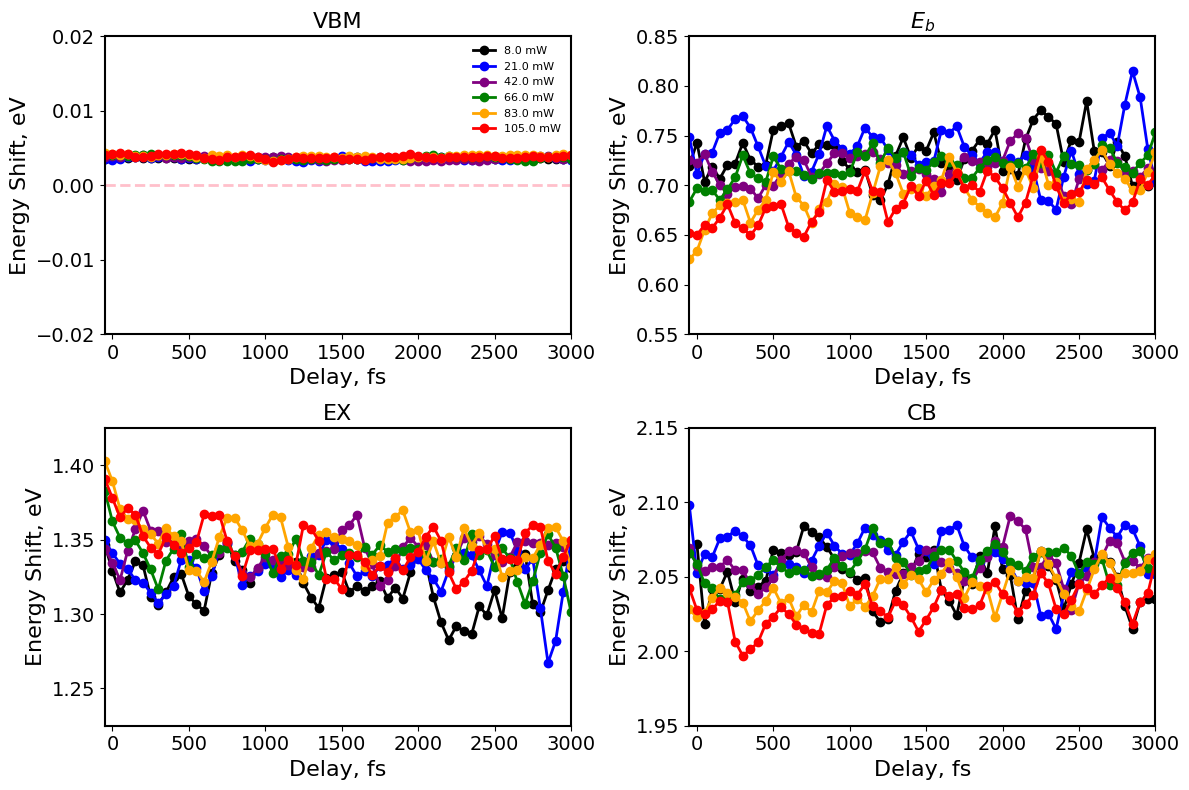

In [151]:
### PLOT THE FITS: THIS PLOTS THE PEAK POSITION (eV)

fig, axx = plt.subplots(2, 2, height_ratios = [1,1], width_ratios = [1,1])
fig.set_size_inches(12, 8, forward=False)
ax = axx.flatten()

for s in np.arange(len(power)):
    res = vars()[str('res_'+str(scans_[s]))]
    res = res.sel(delay = slice(-350, delay_f))
    ax_delay = res.delay.values + 150
    t0 = np.abs(ax_delay - 0).argmin()
    
    vb_shift = fits_vb_delay[s,:]# - np.mean(fits_vb_delay[s,t0-2:t0+2,0], axis = 0)
    
    #ex_shift = (fits_excited_all[s,:,2]) - np.mean(fits_excited_all[0,t0-2:t0+2,2], axis = 0)
    #ex_shift = (fits_excited_all[s,:,2]) - np.mean(fits_excited_all[s,t0-2:t0+2,2], axis = 0)  - vb_shift
    ex_shift = (fits_excited_all[s,:,2])# - vb_shift

    #cb_shift = (fits_excited_delay[s,:,1]) - np.mean(fits_excited_delay[0,t0-2:t0+2,1], axis = 0)
    #cb_shift = (fits_excited_delay[s,:,1]) - np.mean(fits_excited_delay[s,t0-2:t0+2,1], axis = 0)  - vb_shift
    cb_shift = (fits_excited_all[s,:,3])# - vb_shift

    #vb_shift = vb_shift - vb_shift 

    eb_shift = np.abs(fits_excited_all[s,:,2] - fits_excited_all[s,:,3])
    #eb_shift = eb_shift - np.mean(eb_shift[0:t0])

    ax[0].plot(ax_delay, vb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    ax[2].plot(ax_delay, ex_shift, label = (str(round(power[s],))) + ' mW', color = colors[s], marker = 'o')
    ax[3].plot(ax_delay, cb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    ax[1].plot(ax_delay, eb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')

ax[0].set_title('VBM')
ax[1].set_title('$E_{b}$')
ax[2].set_title('EX')
ax[3].set_title('CB')
ax[0].legend(frameon=False)

ax[0].set_ylim([-0.02,.02])
ax[1].set_ylim([0.55,.85])
ax[2].set_ylim([1.225,1.425])
ax[3].set_ylim([1.95,2.15])
#ax[0].set_ylim([-0.1,.05])

for a in [0,1,2,3]:
    ax[a].axhline(0, linestyle = 'dashed', color = 'pink')
    ax[a].set_xlabel('Delay, fs')
    ax[a].set_ylabel('Energy Shift, eV')
    ax[a].set_xlim(-50,3000)
fig.tight_layout()

ValueError: 'x' and 'y' must have the same size

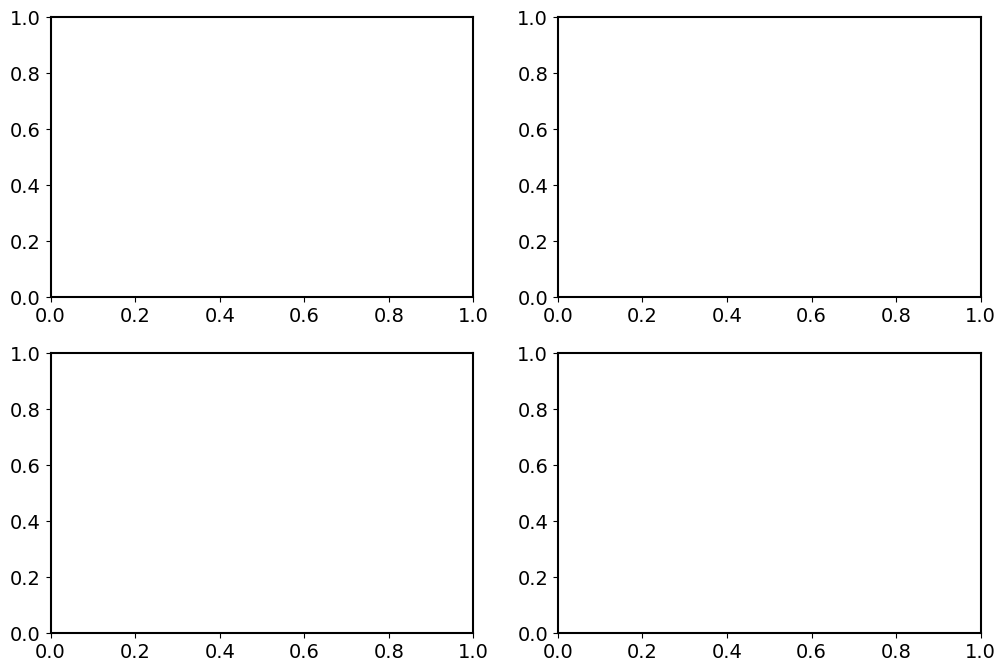

In [58]:
### PLOT THE FITS: THIS PLOTS THE PEAK POSITION (eV) WITH ERROR BARS

fig, axx = plt.subplots(2, 2, height_ratios = [1,1], width_ratios = [1,1])
fig.set_size_inches(12, 8, forward=False)
ax = axx.flatten()

#for s in np.arange(len(power)):
for s in [0,1,2,3,4,5]:
    res = vars()[str('res_'+str(scans_[s]))]
    res = res.sel(delay = slice(-300, delay_f))
    ax_delay = res.delay.values + 120
    t0 = np.abs(ax_delay - 0).argmin()
    
    vb_shift = fits_vb_delay[s,:,0] - np.mean(fits_vb_delay[s,t0-2:t0+2,0], axis = 0)
    
    #ex_shift = (fits_excited_all[s,:,2]) - np.mean(fits_excited_all[0,t0-2:t0+2,2], axis = 0)
    #ex_shift = (fits_excited_all[s,:,2]) - np.mean(fits_excited_all[s,t0-2:t0+2,2], axis = 0)  - vb_shift
    ex_shift = (fits_excited_all[s,:,2]) - vb_shift

    #cb_shift = (fits_excited_delay[s,:,1]) - np.mean(fits_excited_delay[0,t0-2:t0+2,1], axis = 0)
    #cb_shift = (fits_excited_delay[s,:,1]) - np.mean(fits_excited_delay[s,t0-2:t0+2,1], axis = 0)  - vb_shift
    cb_shift = (fits_excited_all[s,:,3]) - vb_shift

    #vb_shift = vb_shift - vb_shift 

    eb_shift = np.abs(fits_excited_all[s,:,2] - fits_excited_all[s,:,3])
    #eb_shift = eb_shift - np.mean(eb_shift[0:t0])

    #ax[0].plot(ax_delay, vb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    #ax[2].plot(ax_delay, ex_shift, label = (str(round(power[s],))) + ' mW', color = colors[s], marker = 'o')
    #ax[3].plot(ax_delay, cb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    #ax[1].plot(ax_delay, eb_shift, label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    
    yerror = fits_vb_delay_err[s,:]
    ax[0].errorbar(ax_delay, np.squeeze(vb_shift), yerr= np.squeeze(yerror), label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    
    yerror = fits_excited_delay_err[s,:,0]
    ax[2].errorbar(ax_delay, np.squeeze(ex_shift), yerr= np.squeeze(yerror),  label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    
    yerror = fits_excited_delay_err[s,:,1]
    ax[3].errorbar(ax_delay, np.squeeze(cb_shift), yerr= np.squeeze(yerror), label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')
    
    yerror = np.sqrt(fits_excited_delay_err[s,:,0]**2 + fits_excited_delay_err[s,:,1]**2)
    ax[1].errorbar(ax_delay, eb_shift, yerr = np.squeeze(yerror),  label = (str(round(power[s],0))) + ' mW', color = colors[s], marker = 'o')

ax[0].set_title('VBM')
ax[1].set_title('$E_{b}$')
ax[2].set_title('EX')
ax[3].set_title('CB')
ax[0].legend(frameon=False)

ax[0].set_ylim([-0.05,.05])
ax[1].set_ylim([0.55,.85])
ax[2].set_ylim([1.335,1.475])
ax[3].set_ylim([2.05,2.225])
#ax[0].set_ylim([-0.1,.05])

for a in [0,1,2,3]:
    ax[a].axhline(0, linestyle = 'dashed', color = 'pink')
    ax[a].set_xlabel('Delay, fs')
    ax[a].set_ylabel('Energy Shift, eV')
    ax[a].set_xlim(-100,3000)

fig.tight_layout()

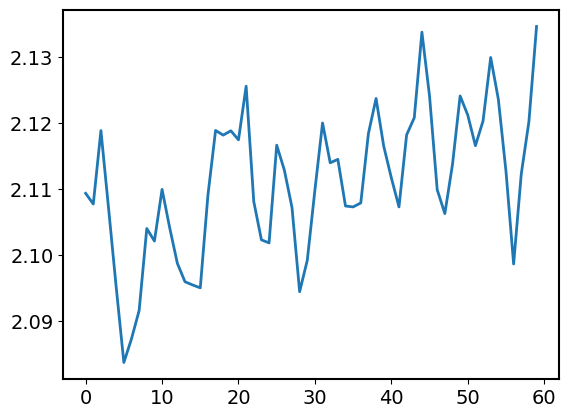

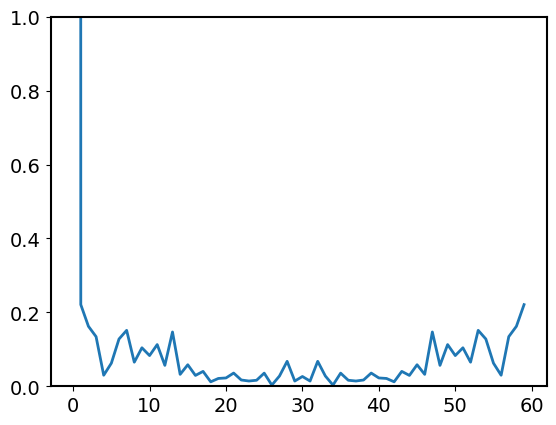

In [348]:
import numpy.fft

plt.plot(cb_shift[5:-2])
plt.show()
fft_test = np.fft.fft(cb_shift[5:-2])
plt.plot(np.abs(fft_test))
plt.ylim(0,1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


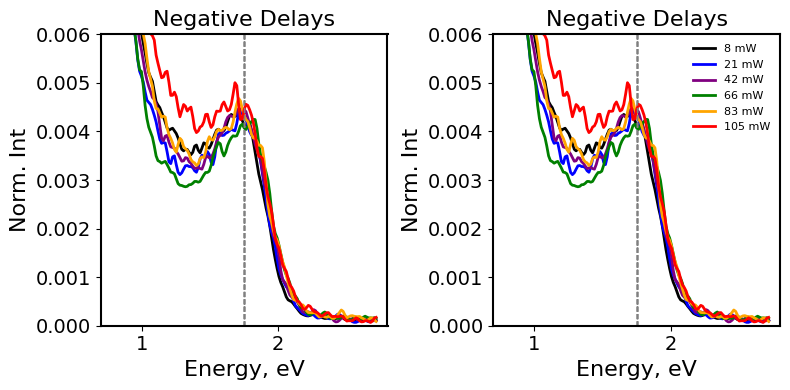

In [192]:
fig, axx = plt.subplots(1,2)
fig.set_size_inches(8, 4, forward=False)
ax = axx.flatten()

test_cases = [-500, 500]
D = len(test_cases)

for dd in np.arange(0,len(test_cases)):
    for s in np.arange(0,len(power)):
        
        d = np.abs(test_cases[dd]-EDCs_diff_delays.delay.values).argmin()
        res_to_plot = vars()[str('res_'+str(scans_[s]))]
        delays = EDCs_diff_delays.delay.values
        
        ###
        EDCs = res_to_plot.sel(Angle = slice(a_full[0],a_full[1])).sum(axis=0)
        EDCs_neg = EDCs.sel(delay = slice(-700,-250)).sum(axis=1)
        EDCs_neg = EDCs_neg/3e9#/np.max(EDCs_neg)
        
        edc_axis = EDCs_neg.Ekin.values
        energy_axis = edc_axis - 19.65
        trunc_e = 1.1
        trunc1 = np.abs(energy_axis - trunc_e).argmin()
        edc = (EDCs_neg)

        ax[dd].plot(energy_axis, edc, linestyle = '-', color = colors[s], label = str(round(power[s])) + ' mW')
        ax[dd].axvline(1.75, color = 'grey', linestyle = '--', linewidth = 1)
        ax[dd].set_title('Negative Delays')
        ax[dd].set_ylim([-0.0, 0.006])
        ax[dd].set_xlim([.7, 2.8])
        ax[dd].set_ylabel('Norm. Int')
        ax[dd].set_xlabel('Energy, eV')
        ax[1].legend(frameon=False)
fig.tight_layout()

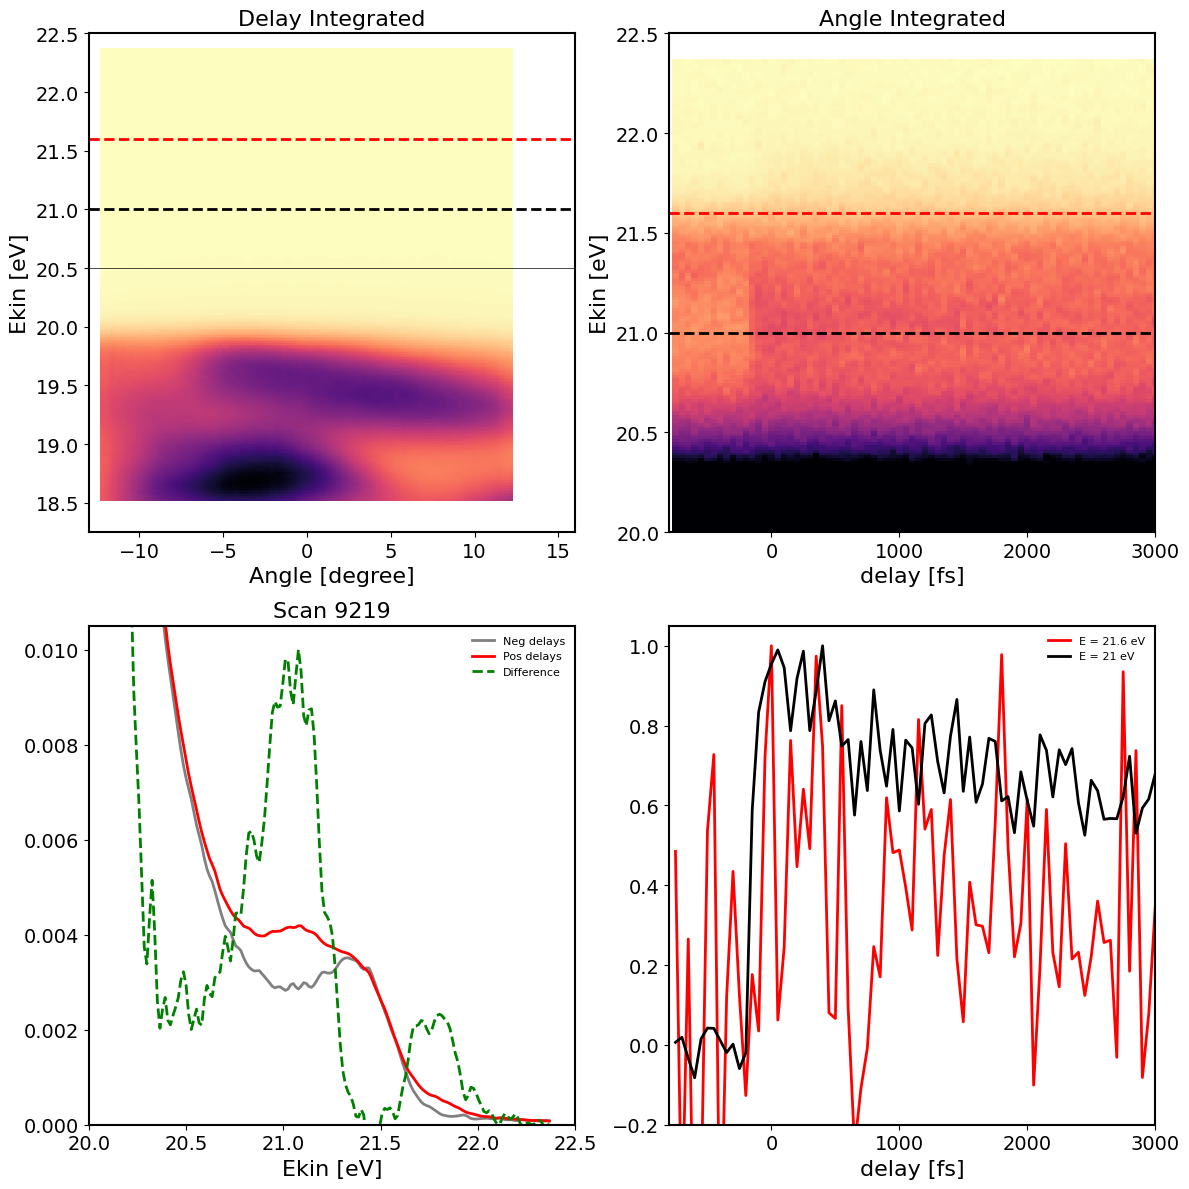

In [829]:
# Plot delay Comparisons....

delay_limit, delay_limit_neg = 3000, -800
cmap_max = 0.012

E, Eint = [21.6, 21], 0.05 # center energies, half of full E integration range

a, aint, a_full = [-12, 15], 20, [-11, 15]

######

s = [9228]

######
fig, axx = plt.subplots(2, 2, width_ratios=[1, 1], height_ratios = [1, 1])
fig.set_size_inches(12, 12, forward=False)
axx = axx.flatten()

for s in range(0,len(s)):
    res_to_plot = vars()[str('res_'+str(scans[s]))] 
    
    if scans[s] in (scans_delay_shift):
        res_to_plot = res_to_plot.shift(delay=3)

    res_to_plot_EDCs = res_to_plot.sel(Angle = slice(a[0],a[1])).sum(axis=0)
    res_to_plot_EDCs_neg = res_to_plot_EDCs.sel(delay = slice(-900,-250)).sum(axis=1)
    res_to_plot_EDCs_pos = res_to_plot_EDCs.sel(delay = slice(0, 3000)).sum(axis=1)
    res_to_plot_EDCs_neg = res_to_plot_EDCs_neg/np.max(res_to_plot_EDCs_neg)
    res_to_plot_EDCs_pos = res_to_plot_EDCs_pos/np.max(res_to_plot_EDCs_pos)
    
    EDC_diff = res_to_plot_EDCs_pos - res_to_plot_EDCs_neg
    EDC_diff = 0.01*EDC_diff/np.max(EDC_diff.sel(Ekin=slice(20.5,22.5)))
    #EDC_diff = EDC_diff*0.08
    
    res_to_plot_angle = res_to_plot.sel(delay = slice(-200,3000)).sum(axis=2)
    res_to_plot_delay = res_to_plot_angle/np.max(res_to_plot_angle)

    res_to_plot_delay = res_to_plot.sel(Angle = slice(a[0],a[1])).sum(axis=0)
    res_to_plot_delay = res_to_plot_delay/np.max(res_to_plot_delay)

    trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
    trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))
    trace_3 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(21.4-Eint, 21.4+Eint)).sum(axis=(0,1))

    trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-1000,-300)))
    trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-1000,-300)))

    trace_3 = trace_3/np.max(trace_3)

    trace_3 = trace_3-np.mean(trace_3.sel(delay =slice(-500,-200)))
    
    trace_1 = trace_1/np.max(trace_1)
    trace_2 = trace_2/np.max(trace_2) 
    #trace_3 = trace_3/np.max(trace_3) 

######################
###### Plotting ######
######################
    
    time_int_panel = 0
    ang_int_panel = 1
    edc_panel = 2
    dyn_panel = 3
    
    res_to_plot_angle.plot(ax = axx[time_int_panel], add_colorbar=False, x='Angle', y='Ekin', cmap='magma_r', vmax = None , ylim=[18.25,22.5], xlim=[-13,16])
    #diff_map.plot(ax = axx[4*s+1], add_colorbar=False, x='Angle', y='Ekin', cmap='coolwarm', vmax = None , ylim=[18.25,22.5], xlim=[-13,16])
    axx[time_int_panel].axhline(20.5, linestyle = 'solid', color = 'black', linewidth = 0.5)
    if aint < 10:
        axx[time_int_panel].axvline(a[0], linestyle = 'dashed', color = 'black')
        axx[time_int_panel].axvline(a[1], linestyle = 'dashed', color = 'black')
    axx[time_int_panel].axhline(E[0], linestyle = 'dashed', color = 'red')
    axx[time_int_panel].axhline(E[1], linestyle = 'dashed', color = 'black')
    axx[time_int_panel].set_title('Delay Integrated')
    
    res_to_plot_EDCs_neg.plot(ax=axx[edc_panel], color = 'grey', label = 'Neg delays')
    res_to_plot_EDCs_pos.plot(ax=axx[edc_panel], color = 'red', label = 'Pos delays')
    EDC_diff.plot(ax=axx[edc_panel], color = 'green', label = 'Difference', linestyle = 'dashed')

    axx[edc_panel].set_xlim(20, 22.5)
    axx[edc_panel].set_ylim(-0.000, 0.0105)
#    axx[3*s].set_title('Scan ' + str(scans[s]) + ': ' + 'Pump = ' + str(scans_Info[scans[s]][0]) + 'nm, ' + str(scans_Info[scans[s]][1]) + 'mW. T = ' + str(scans_Info[scans[s]][2]) + ' K')
    axx[edc_panel].set_title('Scan ' + str(scans[s]))
    axx[edc_panel].legend(loc = 'best', frameon=False)
    axx[edc_panel].axvline(19.6, linestyle = 'dashed', color = 'black')

    res_to_plot_delay.plot(ax=axx[ang_int_panel], add_colorbar=False, x='delay', y='Ekin', cmap='magma_r', vmax = cmap_max)
    axx[ang_int_panel].axhline(E[0], linestyle = 'dashed', color = 'red')
    axx[ang_int_panel].axhline(E[1], linestyle = 'dashed', color = 'black')

    axx[ang_int_panel].set_title('Angle Integrated')
    axx[ang_int_panel].set_xlim(delay_limit_neg, delay_limit)
    axx[ang_int_panel].set_ylim(20, 22.5)
    
    trace_1.plot(ax = axx[dyn_panel], color = 'red', label = 'E = ' + str(E[0]) + ' eV')
    trace_2.plot(ax = axx[dyn_panel], color = 'black', label = 'E = ' + str(E[1]) + ' eV')   
    #trace_3.plot(ax = axx[3*s+2], color = 'grey', label = 'E = ' + str(21.4) + ' eV')    

    axx[dyn_panel].set_xlim(delay_limit_neg, delay_limit)
    axx[dyn_panel].set_ylim(-0.2, 1.05)
    #axx[3*s+2].set_title('Pump : ' + str(scan_info[scans[s]][0]) + 'nm, ' + str(scan_info[scans[s]][1]) + 'mW. T = ' + str(scans_Info[scans[s]][2]) + ' K')
    axx[dyn_panel].legend(frameon = False)

params = {'lines.linewidth' : 2.5, 'axes.linewidth' : 2, 'axes.labelsize' : 20, 
              'xtick.labelsize' : 16, 'ytick.labelsize' : 16, 'axes.titlesize' : 20, 'legend.fontsize' : 16}
    
plt.rcParams.update(params)

fig.tight_layout()


In [78]:
scan_info[str(9219)].get("Wavelength")

'910'

### Show Initial Plots of the Dynamics

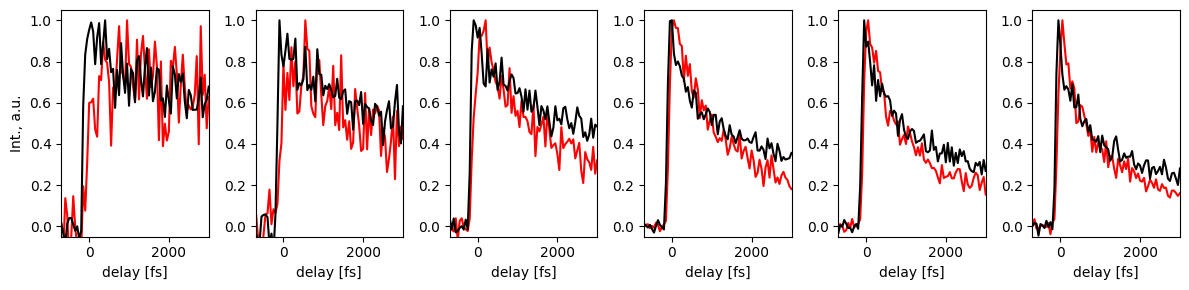

In [853]:
delay_limit, delay_limit_neg = 3000, -700
cmap_max = 0.012

#scans = [9216, 9370, 9517]

E, Eint = [21.75, 21], 0.05 # center energies, half of full E integration range
a, aint, a_full = [-12, 15], 20, [-11, 15]

fig, axx = plt.subplots(1,len(scans))
fig.set_size_inches(12, 3, forward=False)
axx = axx.flatten()

cn = 100
colors = plt.cm.Reds(np.linspace(.25, 1, cn))
cm = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=power[0],vmax=power[-1]), cmap=plt.cm.Reds)

colors2 = plt.cm.bone_r(np.linspace(0.25, 1, cn)) 
cm2 = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=power[0],vmax=power[-1]), cmap=plt.cm.bone_r)

fluence_cbar = np.linspace(power[0], power[-1], cn)
counter = 0 
for s in np.arange(0,len(scans)):  #loop over the scans and the fluence simultaniously
    res_to_plot = vars()[str('res_'+str(scans[s]))]
     ### Calculating traces ###
    trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
    trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))

    trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-600,-250)))
    trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-600,-250)))
    
    trace_1 = trace_1/np.max(trace_1)
    trace_2 = trace_2/np.max(trace_2)
    
    I1 = trace_1.values
    t1 = trace_1.coords['delay'].values
    I2 = trace_2.values
    t2 = trace_2.coords['delay'].values
    
    j_fluence = (np.abs(fluence_cbar-power[s])).argmin()

    #im = axx[counter].plot(t1,I1, color = colors[j_fluence])
    im = axx[counter].plot(t1,I1, color = 'red')
    #axx[s].set_title('Higher')
    axx[counter].set_xlabel('delay [fs]')
    #axx[0].legend(frameon = False,loc='best', fontsize = 12)

    #axx[counter].plot(t2,I2, color = colors2[j_fluence])
    axx[counter].plot(t2,I2, color = 'black')
    axx[counter].set_xlim([-700,3000])
    axx[counter].set_ylim([-0.05,1.05])

    #axx[0].set_title()
    #axx[0].set_xlabel('delay [fs]')
    #axx[1].legend(frameon = False,loc='best', fontsize = 12)    
    counter = counter + 1

###

axx[1].set_xlim([-700,3000])
axx[0].set_ylabel('Int., a.u.')
#cbar = plt.colorbar(cm, ax=axx[0])
#cbar.set_label('Fluence', rotation=90, fontsize=22)
#cbar.ax.tick_params(labelsize=20)

#cbar = plt.colorbar(cm2, ax=axx[1])
#cbar.set_label('Fluence', rotation=90, fontsize=22)
#cbar.ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()        


### Fluence-Dependent Time Traces

KeyError: 'res_9367'

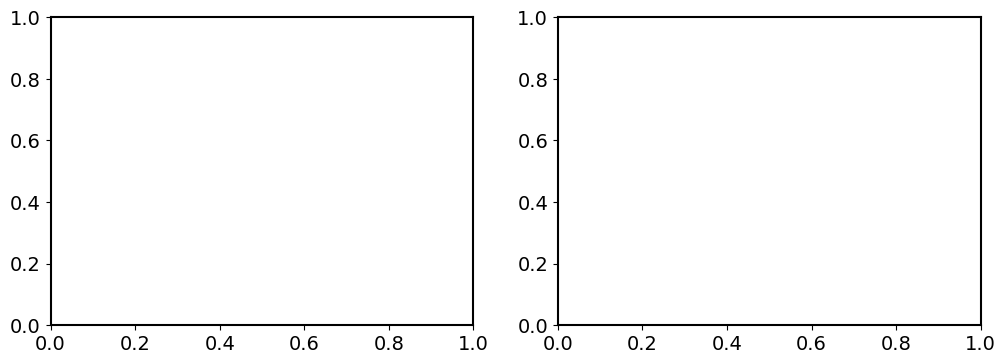

In [61]:

scans, power = [9367, 9368, 9370, 9373, 9378], [6.3, 2.9, 8, 10, 12.6, 4]

#scans, power = [9408, 9409, 9410, 9411, 9412], [8, 4, 12.5, 2, 8]

#scans, power = [9525, 9526, 9517], [20, 40, 36]

power = [p for p in power]

delay_limit, delay_limit_neg = 3000, -700
cmap_max = 0.012

E, Eint = [21.75, 21], 0.05 # center energies, half of full E integration range
a, aint, a_full = [-12, 15], 20, [-11, 15]

fig, axx = plt.subplots(1,2)
fig.set_size_inches(12, 4, forward=False)
axx = axx.flatten()

cn = 100
p_min = np.min(power)
p_max = np.max(power)

colors = plt.cm.Reds(np.linspace(0.25,1, cn))
cm = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=p_min,vmax=p_max), cmap=plt.cm.Reds)

colors2 = plt.cm.bone_r(np.linspace(0.25, 1, cn)) 
cm2 = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=p_min,vmax=p_max), cmap=plt.cm.bone_r)

fluence_cbar = np.linspace(p_min, p_max, cn)

for s in np.arange(0,len(scans)):  #loop over the scans and the fluence simultaniously
    res_to_plot = vars()[str('res_'+str(scans[s]))]
     ### Calculating traces ###

    trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
    trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))

    trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-600,-250)))
    trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-600,-250)))
    
    trace_1 = trace_1/np.max(trace_2)
    trace_2 = trace_2/np.max(trace_2)

    I1 = trace_1.values
    t1 = trace_1.coords['delay'].values
    I2 = trace_2.values
    t2 = trace_2.coords['delay'].values
    
    j_fluence = (np.abs(fluence_cbar-power[s])).argmin()

    im = axx[0].plot(t1,I1, color = colors[j_fluence])
    axx[0].set_title('Higher')
    axx[0].set_xlabel('delay [fs]')
    #axx[0].legend(frameon = False,loc='best', fontsize = 12)

    axx[1].plot(t2,I2, color = colors2[j_fluence])
    axx[1].set_title('Lower')
    axx[1].set_xlabel('delay [fs]')
    #axx[1].legend(frameon = False,loc='best', fontsize = 12)    
###

axx[0].set_xlim([-700,3000])
axx[1].set_xlim([-700,3000])
axx[0].set_ylabel('Int., a.u.')
cbar = plt.colorbar(cm, ax=axx[0])
cbar.set_label('Fluence', rotation=90, fontsize=22)
cbar.ax.tick_params(labelsize=20)

cbar = plt.colorbar(cm2, ax=axx[1])
cbar.set_label('Fluence', rotation=90, fontsize=22)
cbar.ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()        
